<a href="https://colab.research.google.com/github/IrinaPash268/DiplomSf2/blob/main/Diplom_sf_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дипломный проект «Модель прогнозирования стоимости жилья для агентства недвижимости»
#Бриф учебного кейса «Модель прогнозирования стоимости жилья для агентства недвижимости»
Задача: разработать модель, которая позволила бы агентству недвижимости обойти конкурентов по скорости и качеству совершения сделок.
## Описание данных:
➔ 'status' — статус продажи;
➔ 'private pool' и 'PrivatePool' — наличие собственного бассейна;
➔ 'propertyType' — тип объекта недвижимости;
➔ 'street' — адрес объекта;
➔ 'baths' — количество ванных комнат;
➔ 'homeFacts' — сведения о строительстве объекта (содержит несколько
типов сведений, влияющих на оценку объекта);
➔ 'fireplace' — наличие камина;
➔ 'city' — город;
➔ 'schools' — сведения о школах в районе;
➔ 'sqft' — площадь в футах;
➔ 'zipcode' — почтовый индекс;
➔ 'beds' — количество спален;
➔ 'state' — штат;
➔ 'stories' — количество этажей;
➔ 'mls-id' и 'MlsId' — идентификатор MLS (Multiple Listing Service, система
мультилистинга);
➔ 'target' — цена объекта недвижимости (целевой признак, который
необходимо спрогнозировать).

## Анализ и обработка данных

In [2796]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn import model_selection
from sklearn import feature_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
import xgboost as xgb

import pickle


import warnings
warnings.filterwarnings('ignore')

In [2797]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2798]:
%cd '/content/drive/My Drive'
data = pd.read_csv('data.csv')

/content/drive/My Drive


In [2799]:
#Прочитаем данные
print('Количество строк и столбцов в данных: {}'.format(data.shape))

Количество строк и столбцов в данных: (377185, 18)


In [2800]:
#Выведем первые пять значений
data.head()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


In [2801]:
#Рассмотрим основную информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

Данные представлены в 18 колонках, все данные имеют текстовый формат.
Имеются 2 пары повторяющихся названий столбцов:'PrivatePool' и 'private pool', 'mls-id' и 'MLsId'.
Количество значений в исследуемых столбцах различное: 'PrivatePool' - 40311, 'private pool' - 4181; 'mls-id' - 24942, 'MLsId' - 310305.
Проведем очистку данных.

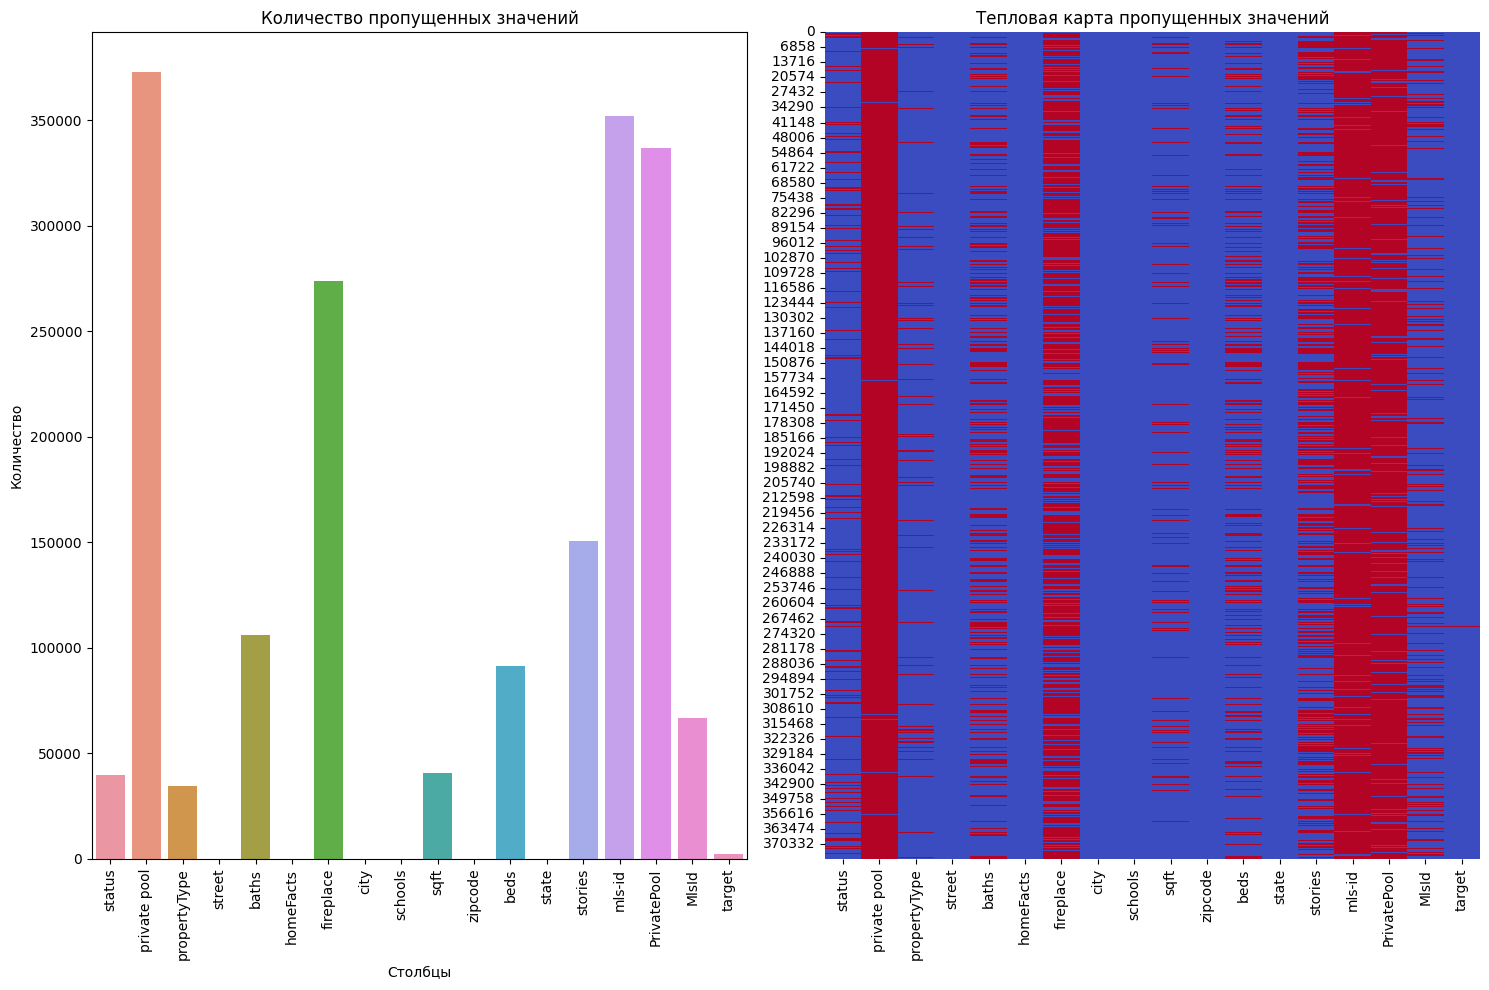

In [2802]:
#Построим столбцатую диаграмму пропусков
# Информация о количестве пропущенных значений по каждому столбцу
missing_values = data.isnull().sum()
plt.figure(figsize=(15, 10))
# Построение графика количества пропущенных значений
plt.subplot(1, 2, 1)
sns.barplot(x=missing_values.index, y=missing_values)
plt.title('Количество пропущенных значений')
plt.xlabel('Столбцы')
plt.ylabel('Количество')
plt.xticks(rotation='vertical')

# Построение тепловой карты
plt.subplot(1, 2, 2)
sns.heatmap(data.isnull(), cbar=False, cmap='coolwarm')
plt.title('Тепловая карта пропущенных значений')

plt.tight_layout()  # Для избежания наложения графиков
plt.show()

In [2803]:
#Отобразим пропуски
for column_name, missing_count in missing_values.items():
    if missing_count > 0:
        percentage = (missing_count / len(data)) * 100
        print(f'В столбце {column_name} {missing_count} пропусков, т. е. {percentage:.2f}% от общего числа данных в столбце')

В столбце status 39918 пропусков, т. е. 10.58% от общего числа данных в столбце
В столбце private pool 373004 пропусков, т. е. 98.89% от общего числа данных в столбце
В столбце propertyType 34733 пропусков, т. е. 9.21% от общего числа данных в столбце
В столбце street 2 пропусков, т. е. 0.00% от общего числа данных в столбце
В столбце baths 106338 пропусков, т. е. 28.19% от общего числа данных в столбце
В столбце fireplace 274070 пропусков, т. е. 72.66% от общего числа данных в столбце
В столбце city 34 пропусков, т. е. 0.01% от общего числа данных в столбце
В столбце sqft 40577 пропусков, т. е. 10.76% от общего числа данных в столбце
В столбце beds 91282 пропусков, т. е. 24.20% от общего числа данных в столбце
В столбце stories 150715 пропусков, т. е. 39.96% от общего числа данных в столбце
В столбце mls-id 352243 пропусков, т. е. 93.39% от общего числа данных в столбце
В столбце PrivatePool 336874 пропусков, т. е. 89.31% от общего числа данных в столбце
В столбце MlsId 66880 пропуско

Сделаем выводы на основе графиков и строковых данных:
1. Целевой признак "target" содержит 0.66% пропущенных значений (или 2 481 запись).
2. Столбцы "private pool" и "PrivatePool" имеют 98,89% и 89,31% пропусков соответственно. Рассмотим их далее.
3. Столбцы "mls-id" и "MlsId" содержат 93,39% и 17,73% пропусков соответственно. Рассмотрим их далее.
4. Признак "fireplace" (наличие камина) содержит 73% пропущенных значений. Несмотря на большое количество пропусков, данный признак кажется значимым, поэтому попробуем с ним поработать далее.

In [2804]:
#Рассмотрим сначала столбцы "private pool" и "PrivatePool"
print('Столбцы "private pool" и "PrivatePool" одинаковые:{}'.format(data['private pool'].equals(data['PrivatePool'])))

Столбцы "private pool" и "PrivatePool" одинаковые:False


In [2805]:
#Рассмотрим уникальные значения в столбцах
print('Уникальные значения в столбце "PrivatePool":{}'.format(data['PrivatePool'].unique()))
print('Уникальные значения в столбце "private pool":{}'.format(data['private pool'].unique()))

Уникальные значения в столбце "PrivatePool":[nan 'yes' 'Yes']
Уникальные значения в столбце "private pool":[nan 'Yes']


In [2806]:
#Создадим объединенный столбец из значений столбцов, а также сразу закодируем его. Так как в столбце 'private pool' меньшее количество значений, можно предположить, что это более свежие данные,
# дополняющие столбец 'PrivatePool'. Данный признак кажется значим, поэтому объединим два столбца, а данные представим в виде булевых переменных

data['Pool'] = data['private pool'].combine_first(data['PrivatePool'])

# Удаляем столбцы
data = data.drop(['PrivatePool', 'private pool'], axis=1)

# Заменим NaN на False и 'yes'/'Yes' на True
data['Pool'] = data['Pool'].fillna(False).replace(['yes', 'Yes'], True)

print("Уникальные значения 'Pool':", data['Pool'].unique())

Уникальные значения 'Pool': [False  True]


In [2807]:
#Аналогично рассмотрм столбцы "mls-id" и "MlsId"
print('Столбцы "mls-id" и "MlsId" одинаковые:{}'.format(data['mls-id'].equals(data['MlsId'])))

Столбцы "mls-id" и "MlsId" одинаковые:False


In [2808]:
#Рассмотрим уникальные значения в столбцах
print('Уникальные значения в столбце "mls-id": {}'.format(str(data['mls-id'].nunique())))
print('Уникальные значения в столбце "MlsId": {}'.format(str(data['MlsId'].nunique())))

Уникальные значения в столбце "mls-id": 24907
Уникальные значения в столбце "MlsId": 232944


In [2809]:
data['MlsID'] = data['mls-id'].combine_first(data['MlsId'])

# Заменим NaN на 0
data['MlsID'] = data['MlsID'].fillna(0)

data = data.drop(['mls-id', 'MlsId'], axis=1)
print("Уникальные значения 'MlsID':", str(data['MlsID'].nunique()))

Уникальные значения 'MlsID': 249013


In [2810]:
#Рассмотрим более подробно признак 'fireplace'
#Рассмотрим уникальные значения в столбцах
print('Уникальные значения в столбце "fireplace":{}'.format(data['fireplace'].unique()))

Уникальные значения в столбце "fireplace":['Gas Logs' nan 'yes' ...
 'Ceiling Fan, Fire Sprinkler System, Storage, Utility Connection'
 'Fireplace-Gas, Fireplace-Wood, Patio, Walk-in Closet'
 'Ceiling Fan, SMAPL, Utility Connection, Walk-In Closets']


In [2811]:
from collections import Counter

# Получение текста из столбца и объединение его в одну строку
text = ' '.join(data['fireplace'].astype(str))

# Разделение текста на слова
words = text.split()

# Получение наиболее часто встречающихся слов и их частоты
word_counts = Counter(words)
top_words = word_counts.most_common()

# Вывод наиболее часто встречающихся слов
for word, count in top_words:
    print(word, count)

nan 274070
yes 50356
Yes 20856
1 15303
Gas 2745
Fireplace 2628
2 2521
Room 2149
Not 1993
Applicable 1993
Wood 1708
Living 1593
Ceiling 1333
Burning 1301
Room, 1175
Fan, 1123
Walk-In 1048
Logs, 1025
Closets 910
Great 868
Closets, 815
In 812
Family 745
Extra 683
Fireplace, 674
Utility 672
Logs 632
Storage, 586
3 571
Features 532
Connection, 474
- 418
LOCATION 399
FAMILYRM, 398
Gas, 382
Gas/Gas 319
No 300
One 299
Log 289
YN 287
Special 279
0 271
FAMILYRM 256
Air 256
Fireplaces 229
Log, 222
Den/Family 213
Connection 198
Fan 198
4 184
Master 173
Natural 164
# 164
Filter, 164
Wet 159
Rm 156
FP 153
Rm, 151
Burning, 148
Starter 145
Redecorated, 124
Bar 123
Electric 119
Forced 113
Fire 112
Other 107
Flooring 106
Den, 102
Woodburning 101
Bedroom 100
Central 100
Bedroom, 99
Decorative, 95
Woodburning, 94
SMTHR, 90
Vented, 89
Starter, 86
Electric, 86
Two 84
Decorative 83
In-Law 82
Sprinkler 81
Vacuum, 80
One, 79
Vented 78
Quarters, 74
Den 74
Fuel,LOCATION 73
System, 73
Stove 69
Elevator, 67
Firepl

In [2812]:
def getfireplace(row):
    row = str(row)
    rowsplited = row.split()
    N = len(rowsplited)
    for elem in range(N):
        if rowsplited[elem] == 'Yes' or rowsplited[elem] == 'yes' or rowsplited[elem] == '1' or rowsplited[elem] == 'Fireplace':
            return True
        if rowsplited[elem] == 'Gas':
            return True
        if rowsplited[elem] == 'wood':
            return True
        if rowsplited[elem] == 'Electric':
            return True
    return False

data['fireplace'] = data['fireplace'].apply(getfireplace)

In [2813]:
data['fireplace']

0          True
1         False
2          True
3          True
4         False
          ...  
377180    False
377181    False
377182    False
377183    False
377184    False
Name: fireplace, Length: 377185, dtype: bool

In [2814]:
#Рассмотрим данные с учетом обновления признаков
data.info()

#Создаем копию данных
data=data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   propertyType  342452 non-null  object
 2   street        377183 non-null  object
 3   baths         270847 non-null  object
 4   homeFacts     377185 non-null  object
 5   fireplace     377185 non-null  bool  
 6   city          377151 non-null  object
 7   schools       377185 non-null  object
 8   sqft          336608 non-null  object
 9   zipcode       377185 non-null  object
 10  beds          285903 non-null  object
 11  state         377185 non-null  object
 12  stories       226470 non-null  object
 13  target        374704 non-null  object
 14  Pool          377185 non-null  bool  
 15  MlsID         377185 non-null  object
dtypes: bool(2), object(14)
memory usage: 41.0+ MB


In [2815]:
#Проверим данные на наличие дубликатов
# сохраняем количество строк до удаления дубликатов
rows_before = data.shape[0]
#удалим дубликаты
data = data.drop_duplicates(ignore_index=True)
# сохраняем количество строк после удаления дубликатов
rows_after = data.shape[0]
# считаем количество удаленных дубликатов
duplicates_removed = rows_before - rows_after
print(f'Удалено {duplicates_removed} дубликатов')

Удалено 50 дубликатов


Рассмотрим более детально каждый столбец, проведем необходимые манипуляции с ними

In [2816]:
#Начнем со столбца 'status'
print(data['status'].head)

<bound method NDFrame.head of 0           Active
1         for sale
2         for sale
3         for sale
4         for sale
            ...   
377130         NaN
377131    for sale
377132    for sale
377133         NaN
377134         NaN
Name: status, Length: 377135, dtype: object>


In [2817]:
# Ранее было установлено, что количество пустых строк в данном столбце составляет 39 918, или 10,58 % от общего количество значений в строке.
# Выберем наиболее 10 наиболее частовстречающихся значений.
print(data['status'].value_counts().nlargest(10))

for sale                     156058
Active                       105207
For sale                      43464
foreclosure                    6425
New construction               5474
Pending                        4702
Pre-foreclosure                2119
Pre-foreclosure / auction      1560
P                              1488
Under Contract Show            1183
Name: status, dtype: int64


In [2818]:
unique_values = sorted(list(data['status'].astype(str).unique()))
print(f"Уникальные значения, отсортированные в алфавитном порядке: {unique_values}")

Уникальные значения, отсортированные в алфавитном порядке: [' / auction', 'A Active', 'Accepted Offer', 'Accepting backups', 'Active', 'Active - Auction', 'Active - Contingent', 'Active Backup', 'Active Contingency', 'Active Contingent', 'Active Option', 'Active Option Contract', 'Active Under Contract', 'Active With Contingencies', 'Active With Offer', 'Active with Contract', 'Active/Contingent', 'Apartment for rent', 'Auction', 'Auction - Active', 'Back On Market', 'Back on Market', 'Backup', 'Backup Contract', 'C', 'C Continue Show', 'CT Insp - Inspection Contingency', 'Closed', 'Coming soon: Dec 1.', 'Coming soon: Dec 10.', 'Coming soon: Dec 11.', 'Coming soon: Dec 12.', 'Coming soon: Dec 13.', 'Coming soon: Dec 14.', 'Coming soon: Dec 15.', 'Coming soon: Dec 16.', 'Coming soon: Dec 18.', 'Coming soon: Dec 2.', 'Coming soon: Dec 20.', 'Coming soon: Dec 23.', 'Coming soon: Dec 24.', 'Coming soon: Dec 25.', 'Coming soon: Dec 27.', 'Coming soon: Dec 3.', 'Coming soon: Dec 4.', 'Coming

Преобразуем данный признак с помощью разделения на 5 категорий:
1. "Active",
2. "Foreclosure",
3. "New construction",
4. "Pending",
5. "Others"

In [2819]:
categories = {
    "Active": [
        "Active", "A Active", "Active/Contingent", "Active Under Contract", "Active Option", "Auction - Active",
        "Active With Contingencies", "Active Option Contract", "Active Contingency", "Active Backup",
        "Active Contingent", "Active - Auction", "Active With Offer", "Active - Contingent", "Active with Contract",
        "Temporary Active", "Re Activated", "Reactivated", "for sale", "For sale"
    ],
    "New construction": ["New construction", "New"
    ],
    "Pending": [
        "P", "Pending", "pending", "P Pending Sale", "Pending Ab", "Pending Continue To Show",
        "Pending Inspection", "Pending Offer Approval", "Pending In", "Pending W/Insp Finance", "Pending Fe",
        "Pending W/Backup Wanted", "Pending Backups Wanted", "Pending With Contingencies", "Lease/Purchase Pending",
        "Pending Bring Backup", "Pending - Taking Backups", "Pending - Continue to Show",
        "Pending Taking Backups", "Offer Pending Signature", "Pending (Do Not Show)", "Pending W/ Cont.",
        "Pending W/Escape Clause", "Pending - Backup Offer Requested", "Pending Sale"
    ],
    "Contingent": [
        "Contingent", "Contingent Finance And Inspection", "Contingent Show",
        "Contingent Take Backup", "Contingent - Sale of Home", "Contingent Finance and Inspection",
        "C Continue Show", "Contingent   Show", "Contingent   Release", "Contingent   No Show",
        "CT Insp - Inspection Contingency", "Contingent   Foreclosure", "Conting Accpt Backups",
        "Contingent - Financing", "Contingency 48 Hr (+/ )", "Contingency Contract", "Contingent Escape"
    ],
    "Foreclosure": [
        "Pre-foreclosure", "Pre-foreclosure / auction", " / auction", "Foreclosed", "foreclosure", "Foreclosure"
    ],
}

def categorize_status(status_value):
    for category, values in categories.items():
        if status_value in values:
            return category
    return "Other"

In [2820]:
#Было обнаружено, что содержатся данные о недвижимости для сдачи в аренду, удаляем их
data.drop(data[data['status'].str.contains('rent', case=False) == True].index, axis=0, inplace=True)

In [2821]:
#Заменим значения на категории
data['status'] = data['status'].apply(categorize_status)

In [2822]:
print(data['status'].value_counts())

Active              306080
Other                44890
Foreclosure          11842
Pending               6731
New construction      6164
Contingent            1016
Name: status, dtype: int64


In [2823]:
# сохраняем количество строк до удаления дубликатов
rows_before = data.shape[0]
#удалим дубликаты
data = data.drop_duplicates(ignore_index=True)
# сохраняем количество строк после удаления дубликатов
rows_after = data.shape[0]
# считаем количество удаленных дубликатов
duplicates_removed = rows_before - rows_after
print(f'Удалено {duplicates_removed} дубликатов')

Удалено 0 дубликатов


In [2824]:
#Проверяем количество пустых значений
print(data['status'].isnull().sum())

0


In [2825]:
#Переходим к столбцу 'PropertyType'
print(data['propertyType'].head)

<bound method NDFrame.head of 0         Single Family Home
1         single-family home
2         single-family home
3         single-family home
4                   lot/land
                 ...        
376718         Single Family
376719                 condo
376720    single-family home
376721                   NaN
376722         Single Family
Name: propertyType, Length: 376723, dtype: object>


In [2826]:
#Ранее было установлено, что в столбце propertyType 34 733 пропусков, т. е. 9.21% от общего числа данных в столбце
#Рассмотрим 10 наиболее частовстречающихся значений
print(data['propertyType'].value_counts().nlargest(30))

single-family home               91982
Single Family                    62867
Single Family Home               31728
condo                            25964
lot/land                         20526
Condo                            16554
townhouse                        11409
Land                             10934
multi-family                      7768
Condo/Townhome/Row Home/Co-Op     7701
Townhouse                         6936
Traditional                       5913
coop                              3265
Multi Family                      2791
High Rise                         1823
Ranch                             1781
mobile/manufactured               1618
Detached, One Story               1614
Single Detached, Traditional      1581
Contemporary                      1557
Multi-Family Home                 1501
1 Story                           1234
Colonial                          1205
Mobile / Manufactured             1066
Contemporary/Modern               1000
2 Stories                

In [2827]:
unique_values_prop = sorted(list(data['propertyType'].astype(str).unique()))
print(f"Уникальные значения, отсортированные в алфавитном порядке: {unique_values_prop}")

Уникальные значения, отсортированные в алфавитном порядке: [' ', '1 1/2 Story', '1 1/2 Story with Basement', '1 1/2 Story with Basement, Cape Cod', '1 1/2 Story with Basement, Craftsman', '1 1/2 Story with Basement, Traditional', '1 1/2 Story with Basement, Tudor', '1 1/2 Story, Contemporary', '1 1/2 Story, Craftsman', '1 1/2 Story, Modern', '1 1/2 Story, Northwestern Contemporary', '1 1/2 Story, Traditional', '1 1/2 Story, Tudor', '1 Story', '1 Story Traditional', '1 Story with Basement', '1 Story with Basement, Cape Cod', '1 Story with Basement, Contemporary', '1 Story with Basement, Craftsman', '1 Story with Basement, Modern', '1 Story with Basement, Northwestern Contemporary', '1 Story with Basement, Spanish/Southwestern', '1 Story with Basement, Traditional', '1 Story, Cabin', '1 Story, Cape Cod', '1 Story, Colonial', '1 Story, Contemporary', '1 Story, Contemporary, Colonial, Traditional', '1 Story, Contemporary, Other (See Remarks)', '1 Story, Contemporary, Ranch', '1 Story, Cont

In [2828]:
data['propertyType'] = data['propertyType'].replace({
    'manufactured home (house)': 'mobile',
    'prefab': 'mobile',
    'modular':'mobile',
    'mo2le':'mobile',
    'mo2 le':'mobile',
    'mobile/manufactured':'mobile / manufactured',
    'mobile / manufactured':'mobile',
    'ca2 n':'cabin',
    'ca2n':'cabin',
    'midcentury': 'mid century',
    'mid century': 'mid-century',
    'single family': 'single-family home',
    'Single Family': 'single-family home',
    'Single Family Home': 'single-family home',
    'townhome':'townhouse',
    'multi-family':'multi family',
    'multi family': 'multi-family home',
    'multi-family home ':'multi-family home',
    'unknown':'Nan',
    'nan':'Nan',
    ' ':'',
    '  ':'',
    })
data['propertyType'] = data['propertyType'].str.lower()
print(data['propertyType'].value_counts().nlargest(10))

single-family home               186577
condo                             42518
lot/land                          20526
townhouse                         18345
land                              10934
multi family                      10559
condo/townhome/row home/co-op      7701
traditional                        5913
coop                               3265
mobile / manufactured              2684
Name: propertyType, dtype: int64


Разделим данные на 5 категорий:
1. single-family home,
2. multy-family,
3. townhouse,
4. coop,
5. others

In [2829]:
categories = {
    "single-family": [
        "single-family home", "traditional", "detached, one story", "single detached, traditional", "1 story", "single detached", "one story"
        ],
    "multy-family": ["multi-family home"
    ],
    "townhouse": ["townhouse"
    ],
    "coop": ["coop"
    ],
}

def categorize_property(property_value):
    for category, values in categories.items():
        if property_value in values:
            return category
    return "Other"

In [2830]:
# 'lot/land' и 'land' данные не имеют информацию о количестве ванных комнат и прочих атрибутов жилых помещений. Скорее всего в базе данных присуствует информацию о продаже земельных участков, удалим их.
data.drop(data[(data['propertyType'] == 'lot/land') | (data['propertyType'] == 'land')].index, axis=0, inplace=True)

In [2831]:
#Заменим значения на категории
data['propertyType'] = data['propertyType'].apply(categorize_property)

In [2832]:
print(data['propertyType'].value_counts())

single-family    198263
Other            123889
townhouse         18345
coop               3265
multy-family       1501
Name: propertyType, dtype: int64


In [2833]:
#Проверяем количество пустых значений
print(data['status'].isnull().sum())

0


In [2834]:
#Переходим к столбцу 'street'
print(data['street'])

0                   240 Heather Ln
1                12911 E Heroy Ave
2                2005 Westridge Rd
3              4311 Livingston Ave
5                1624 S Newkirk St
                    ...           
376718           20800 NE 23rd Ave
376719    3530 N Lake Shore Dr #4B
376720           15509 Linden Blvd
376721             7810 Pereida St
376722            5983 Midcrown Dr
Name: street, Length: 345263, dtype: object


Попробуем данные разделить на следующие категории:
1. St,
2. Ave,
3. Blvd,
4. Ln,
5. Other

In [2835]:
data['street'] = data['street'].str.lower()

In [2836]:
conditions = [
    data['street'].str.contains('st|street', case=False),
    data['street'].str.contains('ave|avenue', case=False),
    data['street'].str.contains('blvd|boulevard', case=False),
    data['street'].str.contains('ln|line', case=False)
]

# Список категорий
categories = ['st', 'ave', 'blvd', 'ln']

# Создание нового столбца 'street_type' на основе условий и категорий
data['street_type'] = np.select(conditions, categories, default='Other')

In [2837]:
print(data['street_type'].value_counts())

Other    155169
st       102753
ave       56545
ln        19249
blvd      11547
Name: street_type, dtype: int64


In [2838]:
data.drop('street', axis=1, inplace=True)

In [2839]:
#Проверяем количество пустых значений
print(data['street_type'].isnull().sum())

0


In [2840]:
#Переходим к столбцу 'baths'
print(data['baths'].unique())

['3.5' '3 Baths' '2 Baths' '8 Baths' nan '2' '3' 'Bathrooms: 2' '1,750'
 '4 Baths' '2 ba' 'Bathrooms: 5' '1,000' '7 Baths' '2.0' '3.0'
 'Bathrooms: 1' '4.0' '2.1 Baths' '2.5 Baths' '1' 'Bathrooms: 3' '4.5'
 '6 Baths' 'Bathrooms: 4' '3 ba' '5' '2,500' '5.5 Baths' '1.0' '5 Baths'
 '1.5' '4' '~' '2.5' '4,000' '3.5 Baths' '2,000' '3,000' '8.0' '1 ba'
 '3.5 ba' '5.0' '1,500' '7.0' '1,250' '9 Baths' '2,250' '6.0' '12 Baths'
 '5.5' '3,500' '1.5 Baths' '2,750' 'Bathrooms: 6' '4.5 Baths' '0' '750'
 '5.5+' '6' '10 Baths' '6 ba' 'Bathrooms: 19' '10.0' '1.5 ba' '4 ba'
 '12 ba' '2.5+' '8' '7.5+' 'Bathrooms: 10' '0 / 0' 'Sq. Ft. ' '5 ba'
 '4.5+' '18 Baths' '-- baths' 'Bathrooms: 7' '7' '18' '3.5+' '1.5+'
 '11 Baths' '5,000' '1.75 Baths' '9' '12.0' '1.1 Baths' '6.5'
 'Bathrooms: 8' '10' '19 Baths' 'Bathrooms: 9' '16 Baths' '13 Baths'
 'Bathrooms: 13' '14' '9.0' '8.5+' '7 ba' '12' '2.5 ba' 'Bathrooms: 12'
 '17' 'Bathrooms: 241' '16.0' '10.5+' '8 ba' '6.5+' '6.5 Baths' '14 Baths'
 '7,500+' '7.5' '11.0'

In [2841]:
data['baths'] = data['baths'].str.lower()

In [2842]:
import re

data['baths'] = data['baths'].apply(lambda x: re.sub(r'\s*(baths?|bathrooms?:|rooms:|room?|ba|semimod|~|sq. ft. |--|-|—)\s*', '', str(x)))

In [2843]:
print(data['baths'].unique())

['3.5' '3' '2' '8' 'nan' '1,750' '4' '5' '1,000' '7' '2.0' '3.0' '1' '4.0'
 '2.1' '2.5' '4.5' '6' '2,500' '5.5' '1.0' '1.5' '' '4,000' '2,000'
 '3,000' '8.0' '5.0' '1,500' '7.0' '1,250' '9' '2,250' '6.0' '12' '3,500'
 '2,750' '0' '750' '5.5+' '10' '19' '10.0' '2.5+' '7.5+' '0 / 0' '4.5+'
 '18' '3.5+' '1.5+' '11' '5,000' '1.75' '12.0' '1.1' '6.5' '16' '13' '14'
 '9.0' '8.5+' '17' '241' '16.0' '10.5+' '6.5+' '7,500+' '7.5' '11.0' '20'
 '40' '10 / 10 / 1' '14.0' '2.75' '24' '22.0' '0.00' '2.25' '3.1' '3.25'
 '22' '32' '18.0' '27' '26' '20.0' '9.5' '8.5' '15' '35' '3.75' '29'
 '116 / 116 / 116' '0.0' '21' '5.2' '14.5+' '76' '13.0' '31 / 22' '15.0'
 '23' '3.3' '43' '1.25' '34' '2.2' '1 / 1 / 1 / 1' '55.0' '25' '12.5+'
 '44' '4.25' '4.75' '0.75' '4.1' '5.25' '41.0' '1.8' '10.5' '9.5+' '36'
 '30' '12.5' '24.0' '23.0' '28' '2.8' '34.0' '64.0' '11.5+' '39' '30.0'
 '17.0' '42' '11.5' '3.2' '21 / 21 / 11 / 11' '60' '1 / 10 / 10 / 10'
 '6.75' '68' '44.0']


In [2844]:
data['baths'] = data['baths'].replace(['nan', '0', 'Nan', ''], 0)

В США в полноценной ванной комнате есть четыре основных предмета: ванна, душ, туалет и раковина с проточной водой.
Ванная комната на три четверти обычно включает душевую кабину (вертикальную), унитаз и раковину.
Если мы удалим и душ, и ванну, мы получим «половину ванной комнаты». Это значит, что в случае с полуванной должна быть комната с туалетом и раковиной (чтобы помыть руки!).
«Четвертью санузла» может быть и помещение, в котором находится только душ или только унитаз или только раковина.
Таким образом, если сложить все это вместе, дом может быть указан как 2,5 ванны, 1,75 ванны или 1,5 ванны и так далее.

In [2845]:
print(data['baths'].value_counts().nlargest(40))

2        84648
0        80718
3        53977
4        21391
2.0      16575
2.5      12568
3.0      10868
1        10568
5         7652
1.0       5929
3.5       5257
4.0       4593
6         3560
1,500     2209
1.5       2051
2,000     1795
1,750     1723
7         1709
3,000     1686
5.0       1557
2,250     1442
4.5       1395
1,000     1280
1,250     1208
2,750      965
8          941
2,500      894
6.0        737
3,500      653
9          440
5.5        398
7.0        362
4,000      290
10         271
2.5+       246
750        237
5,000      230
8.0        216
3.5+       210
11         157
Name: baths, dtype: int64


In [2846]:
#Рассмотрим данные со значением 1,750 в столбце baths
print(data.loc[data['baths'] == '1,750'])

        status   propertyType  baths  \
16      Active          Other  1,750   
346     Active  single-family  1,750   
573     Active          Other  1,750   
913     Active          Other  1,750   
1049    Active  single-family  1,750   
...        ...            ...    ...   
375155  Active          Other  1,750   
375641  Active          Other  1,750   
375832  Active          Other  1,750   
376207  Active          Other  1,750   
376297  Active  single-family  1,750   

                                                homeFacts  fireplace  \
16      {'atAGlanceFacts': [{'factValue': '2008', 'fac...      False   
346     {'atAGlanceFacts': [{'factValue': '2011', 'fac...      False   
573     {'atAGlanceFacts': [{'factValue': '', 'factLab...      False   
913     {'atAGlanceFacts': [{'factValue': '1951', 'fac...      False   
1049    {'atAGlanceFacts': [{'factValue': '1988', 'fac...       True   
...                                                   ...        ...   
375155  {'atAGl

In [2847]:
#Данных достаточно много, они разные. Скорее всего при заполнении данных была допущена ошибка, поэтому заменим запятую на точку и округлим до сотых.
data['baths'] = data['baths'].str.replace(',', '.', regex=True)
data['baths'] = pd.to_numeric(data['baths'], errors='coerce')
data['baths'] = data['baths'].round(2)

In [2848]:
print(data['baths'].value_counts().nlargest(40))

2.00      103018
3.00       66531
4.00       26274
1.00       17777
2.50       13462
5.00        9439
3.50        5910
6.00        4297
1.50        4260
7.00        2071
1.75        1812
2.25        1457
4.50        1395
1.25        1216
8.00        1157
2.75        1000
9.00         544
5.50         398
10.00        326
750.00       237
11.00        187
12.00        133
6.50         126
13.00         74
2.10          53
16.00         52
14.00         45
7.50          34
18.00         32
0.00          30
15.00         28
24.00         17
1.10          17
20.00         16
8.50          15
3.10          12
22.00         10
17.00         10
3.25          10
3.75           8
Name: baths, dtype: int64


Text(0, 0.5, '')

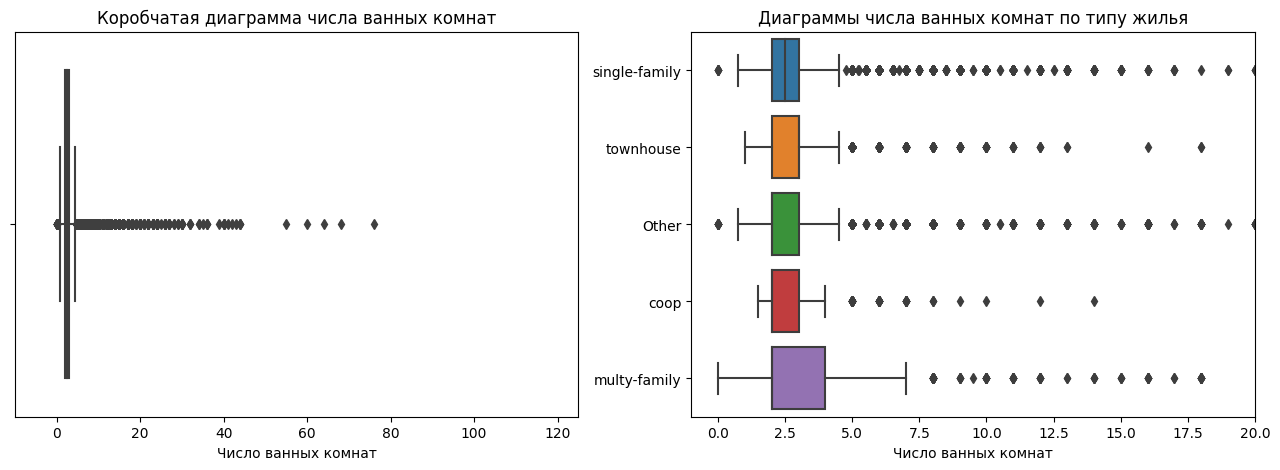

In [2849]:
#Проверим данный столбец на выбросы

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Построим диаграмму признака
boxplot = sns.boxplot(
    data,
    x = 'baths',
    ax = axes[0]
)
boxplot.set(xlim=(-10,125))
boxplot.set_title('Коробчатая диаграмма числа ванных комнат')
boxplot.set_xlabel('Число ванных комнат')
boxplot = sns.boxplot(
    data,
    x = 'baths',
    y = 'propertyType',
    ax = axes[1]
)
boxplot.set(xlim=(-1,20));
boxplot.set_title('Диаграммы числа ванных комнат по типу жилья')
boxplot.set_xlabel('Число ванных комнат')
boxplot.set_ylabel('')

In [2850]:
# Максимальное значение количества ванный комнат - 7 в жилье типа "multy-family", минимальное значение - 0 также в жилье типа "multy-family".
# Используем метод Тьюки

def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1 = x.quantile(0.25)
    quartile_3 = x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(data, 'baths')

print(f"Количество выбросов: {len(outliers)}")
print(f"Количество очищенных данных: {len(cleaned)}")

Количество выбросов: 19358
Количество очищенных данных: 244226


In [2851]:
data['baths_1']=cleaned['baths']

In [2852]:
#Проверяем на пропуски
print(f"Количество пропусков {data['baths_1'].isnull().sum()}")

Количество пропусков 101037


In [2853]:
#Заполним пропуски наиболее часто встречающимися значениями количества ванных для каждого типа собственности
data['baths_1'] = data.groupby('propertyType')['baths_1'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [2854]:
#Проверяем на пропуски
print(f"Количество пропусков {data['baths_1'].isnull().sum()}")

Количество пропусков 0


In [2855]:
print(data['baths_1'].value_counts().nlargest(30))

2.00    201838
3.00     68748
4.00     26274
1.00     17777
2.50     13462
3.50      5910
1.50      4260
1.75      1812
2.25      1457
4.50      1395
1.25      1216
2.75      1000
2.10        53
1.10        17
3.10        12
3.25        10
3.75         8
4.10         3
2.20         2
4.25         2
0.75         2
3.20         2
3.30         1
1.80         1
2.80         1
Name: baths_1, dtype: int64


In [2856]:
data = data.drop('baths', axis=1)

In [2857]:
#Переходим к столбцу 'Homefacts'
print(data['homeFacts'].unique())

["{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': 'Central A/C, Heat Pump', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': '$144', 'factLabel': 'Price/sqft'}]}"
 "{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '5828 sqft', 'factLabel': 'lotsize'}, {'factValue': '$159/sqft', 'factLabel': 'Price/sqft'}]}"
 "{'atAGlanceFacts': [{'factValue': '1961', 'factLabel': 'Year built'}, {'factValue': '1967', 'factLabel': 'Remodeled year'}, {'factValue': 'Forced Air', 'factLabel': 'Heating'}, {'factValue': 'Central', 'factLabel': 'Cooling'}, {'factValue': 'Attached Garage', 'factLab

In [2858]:
#Данный столбец имеет данные в форме словарей. Попробуем выделить из них некоторые признаки

#С помощью регулярных выражений выделим значения для Value и Label
Value = data.homeFacts.str.findall(r"\bfactValue': ([\s\S]+?), 'factLabel\b")
label = data.homeFacts.str.findall(r"\bfactLabel': ([\s\S]+?)[}\b]")
#создадим список названий признаков, удалив лишние кавычки
list_label = ','.join(label[0]).replace("'","").split(',')
list_label

['Year built',
 'Remodeled year',
 'Heating',
 'Cooling',
 'Parking',
 'lotsize',
 'Price/sqft']

In [2859]:
# Создадим эти признаки и заполним значениями
for i, val in enumerate(list_label):
    data[val]=Value.apply(lambda x: x[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345263 entries, 0 to 376722
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          345263 non-null  object 
 1   propertyType    345263 non-null  object 
 2   homeFacts       345263 non-null  object 
 3   fireplace       345263 non-null  bool   
 4   city            345254 non-null  object 
 5   schools         345263 non-null  object 
 6   sqft            321179 non-null  object 
 7   zipcode         345263 non-null  object 
 8   beds            282910 non-null  object 
 9   state           345263 non-null  object 
 10  stories         223883 non-null  object 
 11  target          342804 non-null  object 
 12  Pool            345263 non-null  bool   
 13  MlsID           345263 non-null  object 
 14  street_type     345263 non-null  object 
 15  baths_1         345263 non-null  float64
 16  Year built      345263 non-null  object 
 17  Remodeled 

In [2860]:
#Столбец 'homeFacts' больше не нужен, удаляем его
data = data.drop('homeFacts', axis=1)

In [2861]:
# Рассмотрим получившиеся столбцы
data['Year built'].value_counts()

'2019'    32044
''        31757
'2006'     7973
'2005'     7473
'2007'     7094
          ...  
'1780'        1
'1809'        1
'1823'        1
'1807'        1
'1804'        1
Name: Year built, Length: 229, dtype: int64

In [2862]:
data['Year built'].unique()

array(["'2019'", "'1961'", "'2006'", "'1920'", "'1976'", "'1970'",
       "'1965'", "'2015'", "'1996'", "'1982'", "'1905'", "'2008'",
       "'1899'", "'2016'", "'1954'", "'1989'", "'2014'", "'1915'", "''",
       "'1994'", "'1910'", "'1923'", "'1960'", "'1977'", "'1972'",
       "'1963'", "'1981'", "'1949'", "'1930'", "'1991'", "'1958'",
       "'2005'", "'2017'", "'2018'", "'1983'", "'1928'", "'1998'",
       "'1997'", "'1964'", "'1940'", "'1973'", "'1968'", "'1999'",
       "'1918'", "'2007'", "'1984'", "'1946'", "'2003'", "'2000'",
       "'2004'", "'1969'", "'2002'", "'1952'", "'1974'", "'1947'",
       "'1957'", "'1978'", "'1956'", "'1967'", "'1975'", "'1988'",
       "'1955'", "'1950'", "'1959'", "'2012'", "'1924'", "'1966'",
       "'1992'", "'2001'", "'1995'", "'1985'", "'2010'", "'1971'",
       "'1909'", "'1953'", "'1993'", "'1990'", "'1980'", "'1951'",
       "'1907'", "'1885'", "'1941'", "'1927'", "'1929'", "'1901'", 'None',
       "'1922'", "'1906'", "'1945'", "'1979'", "

In [2863]:
data['Year built'] = data['Year built'].str.replace("'",'', regex=True)
print(data['Year built'].sort_values().unique())

['' '1019' '1057' '1060' '1208' '1703' '1735' '1740' '1750' '1780' '1788'
 '1790' '1794' '1795' '1796' '1799' '1800' '1802' '1803' '1804' '1805'
 '1807' '1808' '1809' '1810' '1811' '1812' '1815' '1816' '1817' '1818'
 '1820' '1822' '1823' '1824' '1825' '1828' '1829' '1830' '1831' '1832'
 '1834' '1835' '1836' '1840' '1842' '1843' '1844' '1845' '1846' '1847'
 '1848' '1850' '1851' '1852' '1853' '1854' '1855' '1856' '1857' '1858'
 '1859' '1860' '1861' '1862' '1863' '1864' '1865' '1866' '1867' '1868'
 '1869' '1870' '1871' '1872' '1873' '1874' '1875' '1876' '1877' '1878'
 '1879' '1880' '1881' '1882' '1883' '1884' '1885' '1886' '1887' '1888'
 '1889' '1890' '1891' '1892' '1893' '1894' '1895' '1896' '1897' '1898'
 '1899' '1900' '1901' '1902' '1903' '1904' '1905' '1906' '1907' '1908'
 '1909' '1910' '1911' '1912' '1913' '1914' '1915' '1916' '1917' '1918'
 '1919' '1920' '1921' '1922' '1923' '1924' '1925' '1926' '1927' '1928'
 '1929' '1930' '1931' '1932' '1933' '1934' '1935' '1936' '1937' '1938'
 '1

In [2864]:
# Заменим пустые значения, '559990649990' 'No Data' на None
data['Year built'] = data['Year built'].replace({'^\s*$':'None',
                                                    '559990649990':'None',
                                                    'No Data':'None',
                                                    '':'None'})
print(data['Year built'].value_counts().nlargest(30))

None    36587
2019    32044
2006     7973
2005     7473
2007     7094
2018     6764
2004     5481
2017     5048
2008     4988
2016     4984
2003     4548
1950     4375
2002     4224
1920     4181
2001     4178
1925     4075
2015     3822
1955     3606
2000     3577
1960     3566
1974     3416
1973     3391
1999     3375
1979     3321
1972     3269
1980     3227
1981     3192
1984     3089
1998     3087
2014     3060
Name: Year built, dtype: int64


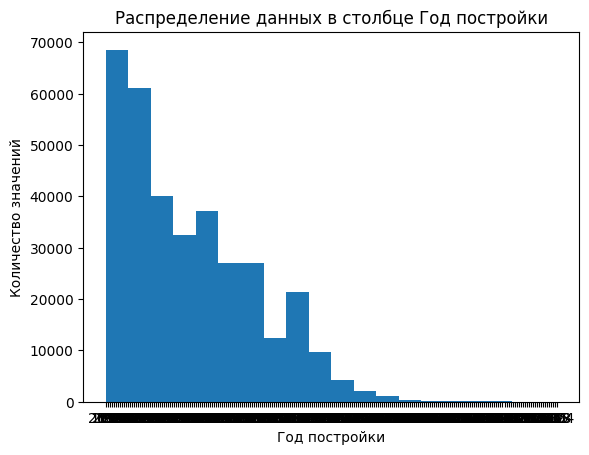

In [2865]:
# Построение гистограммы для столбца 'Year built'
plt.hist(data['Year built'], bins=20)  # Здесь bins - количество интервалов на гистограмме

# Настройка меток осей и заголовка графика
plt.xlabel('Год постройки')
plt.ylabel('Количество значений')
plt.title('Распределение данных в столбце Год постройки')

# Показать график
plt.show()

In [2866]:
#Определение выбросов
def outliers_iqr(data, feature):
    x = pd.to_numeric(data[feature], errors='coerce')
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_fence = quartile_1 - 1.5 * iqr
    upper_fence = quartile_3 + 1.5 * iqr
    outliers = data[(x < lower_fence) | (x > upper_fence)]
    cleaned = data[(x >= lower_fence) & (x <= upper_fence)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(data, 'Year built')

print(f"Количество выбросов: {len(outliers)}")
print(f"Количество очищенных данных: {len(cleaned)}")

Количество выбросов: 1098
Количество очищенных данных: 307578


In [2867]:
data['Year built'] = cleaned['Year built']

In [2868]:
#Проверяем на пропуски
print(f"Количество пропусков {data['Year built'].isnull().sum()}")

Количество пропусков 37685


In [2869]:
# Заполним пустые значения на 0
data['Year built'] = data['Year built'].fillna(0)

In [2870]:
data['Year built'].value_counts().nlargest(20)

0       37685
2019    32044
2006     7973
2005     7473
2007     7094
2018     6764
2004     5481
2017     5048
2008     4988
2016     4984
2003     4548
1950     4375
2002     4224
1920     4181
2001     4178
1925     4075
2015     3822
1955     3606
2000     3577
1960     3566
Name: Year built, dtype: int64

In [2871]:
print(f"Процент пустых значений: {round(((data['Year built']==0).sum()) / (data['Year built'].shape[0]) * 100)} %")

Процент пустых значений: 11 %


In [2872]:
#Рассмотрим следующий столбец Remodeled year
data['Remodeled year'].sort_values().unique()

array(["''", "'0'", "'1738'", "'1845'", "'1853'", "'1862'", "'1869'",
       "'1870'", "'1874'", "'1876'", "'1877'", "'1880'", "'1883'",
       "'1884'", "'1885'", "'1886'", "'1887'", "'1888'", "'1889'",
       "'1890'", "'1891'", "'1892'", "'1893'", "'1894'", "'1895'",
       "'1896'", "'1897'", "'1898'", "'1899'", "'1900'", "'1901'",
       "'1902'", "'1903'", "'1904'", "'1905'", "'1906'", "'1907'",
       "'1908'", "'1909'", "'1910'", "'1911'", "'1912'", "'1913'",
       "'1914'", "'1915'", "'1916'", "'1917'", "'1918'", "'1919'",
       "'1920'", "'1921'", "'1922'", "'1923'", "'1924'", "'1925'",
       "'1926'", "'1927'", "'1928'", "'1929'", "'1930'", "'1931'",
       "'1932'", "'1933'", "'1934'", "'1935'", "'1936'", "'1937'",
       "'1938'", "'1939'", "'1940'", "'1941'", "'1942'", "'1943'",
       "'1944'", "'1945'", "'1946'", "'1947'", "'1948'", "'1949'",
       "'1950'", "'1951'", "'1952'", "'1953'", "'1954'", "'1955'",
       "'1956'", "'1957'", "'1958'", "'1959'", "'1960'", "'

In [2873]:
data['Remodeled year'] = data['Remodeled year'].replace({'^\s*$':'0',
                                                        "''":'0',
                                                        'None':'0'})
print(data['Remodeled year'].value_counts().nlargest(30))

0         195894
'2006'      5522
'2005'      4808
'2007'      4380
'2008'      3788
'2004'      3360
'1980'      3277
'1970'      3078
'2000'      3056
'2003'      2825
'1985'      2775
'2002'      2699
'1975'      2656
'1990'      2638
'1965'      2571
'2001'      2431
'1983'      2431
'1995'      2360
'1988'      2328
'1962'      2206
'1978'      2182
'1981'      2120
'1998'      2116
'1999'      2068
'1960'      2034
'1982'      2014
'2014'      2000
'1972'      1983
'1984'      1937
'1996'      1897
Name: Remodeled year, dtype: int64


In [2874]:
print(f"Процент пустых значений: {round(((data['Remodeled year']=='0').sum()) / (data['Remodeled year'].shape[0]) * 100)} %")

Процент пустых значений: 57 %


In [2875]:
#Большой процент пустых значений, удаляем признак
data = data.drop(['Remodeled year'], axis=1)

In [2876]:
#Рассмотрим следующий столбец Heating
data['Heating'].value_counts()

'Forced Air'                                                      81827
''                                                                80961
'Forced air'                                                      51493
'Other'                                                           28603
'No Data'                                                          8610
                                                                  ...  
'Exhaust Fans'                                                        1
'Central, Exhaust Fans, Natural Gas, Zoned'                           1
'BR Closet-Electric - new'                                            1
'Wood Stove'                                                          1
'Baseboard, Hot Water, Programmable Thermostat, Radiant Floor'        1
Name: Heating, Length: 1975, dtype: int64

In [2877]:
data['Heating'] = data['Heating'].str.lower()
data['Heating'].value_counts().nlargest(20)

'forced air'                     133320
''                                80961
'other'                           28603
'heat pump'                        8776
'no data'                          8610
'central air'                      7814
'gas'                              7418
'electric'                         7415
'central electric'                 7111
'central'                          6247
'central, electric'                4253
'baseboard'                        3751
none                               3533
'wall'                             3224
'electric heat'                    3064
'heating system'                   2708
'forced air, heat pump'            1767
'radiant'                          1476
'central air, ceiling fan(s)'      1432
'natural gas heat'                 1383
Name: Heating, dtype: int64

In [2878]:
data['Heating'] = data['Heating'].str.replace("'",'', regex=True)
data['Heating'] = data['Heating'].apply(lambda x: 'Nan' if x in ['', 'none', 'no data', ''] else x)
data['Heating'].value_counts().nlargest(30)

forced air                     133320
Nan                             93176
other                           28603
heat pump                        8776
central air                      7814
gas                              7418
electric                         7415
central electric                 7111
central                          6247
central, electric                4253
baseboard                        3751
wall                             3224
electric heat                    3064
heating system                   2708
forced air, heat pump            1767
radiant                          1476
central air, ceiling fan(s)      1432
natural gas heat                 1383
central furnace                  1036
forced air, gas                   962
central electric, zoned           873
forced air heating                810
, gas hot air/furnace             776
gas heat                          769
forced air, natural gas           737
central heating                   646
central gas 

In [2879]:
print(f"Процент пустых значений: {round(((data['Heating']=='Nan').sum()) / (data['Heating'].shape[0]) * 100)} %")

Процент пустых значений: 27 %


In [2880]:
#Представленны различные типы отопления, выделим основные: air, gas, electic, others, Nan
def categorize_heating(heating):
    if isinstance(heating, str):
        if 'air' in heating.lower():
            return 'air'
        elif 'gas' in heating.lower():
            return 'gas'
        elif 'electric' in heating.lower():
            return 'electric'
        elif 'nan' in heating.lower():
            return 'NaN'
        else:
            return 'others'

data['Heating_Category'] = data['Heating'].apply(categorize_heating)

data['Heating_Category'].value_counts().nlargest(30)

air         152270
NaN          93178
others       61984
electric     25109
gas          12722
Name: Heating_Category, dtype: int64

In [2881]:
#Удаляем ненужный столбец
data = data.drop(['Heating'], axis=1)

In [2882]:
#Рассмотрим следующий столбец Cooling
data['Cooling'].value_counts().nlargest(30)

'Central'                                            157484
''                                                    90200
'Central Air'                                         14384
'No Data'                                             10615
'Has Cooling'                                          9730
'None'                                                 7095
'Central Electric'                                     6154
'Wall'                                                 3953
'Central Gas'                                          3573
None                                                   3533
'Central Heating'                                      2807
'Cooling System'                                       2699
'Central A/C'                                          2051
'Other'                                                1835
'Central A/C (Electric), Central Heat (Gas)'           1646
'Central A/C (Electric), Central Heat (Electric)'      1429
'Refrigeration'                         

In [2883]:
data['Cooling'] = data['Cooling'].str.lower()
data['Cooling'] = data['Cooling'].str.replace("'",'', regex=True)
data['Cooling'] = data['Cooling'].apply(lambda x: 'Nan' if x in ['', 'none', 'no data', ''] else x)
data['Cooling'].value_counts().nlargest(30)

central                                            157484
Nan                                                111443
central air                                         14384
has cooling                                          9730
central electric                                     6154
wall                                                 3953
central gas                                          3573
central heating                                      2807
cooling system                                       2699
central a/c                                          2051
other                                                1835
central a/c (electric), central heat (gas)           1646
central a/c (electric), central heat (electric)      1429
refrigeration                                        1075
central, electric                                    1060
electric                                             1012
evaporative                                           997
central air, g

In [2884]:
print(f"Процент пустых значений: {round(((data['Cooling']=='Nan').sum()) / (data['Cooling'].shape[0]) * 100)} %")

Процент пустых значений: 32 %


In [2885]:
#Предположим, что отсутсвующие значения указвают на отсутсвие кондиционера, системы кондиционирования. Какие - то особые категории выделить трудно, поэтому
# с помощью булевых переменных закодируем признак Cooling: есть система кондиционирования - True, отсутствует - False
data['Cooling'] = data['Cooling'].apply(lambda x: True if x not in ['Nan'] else False)
data['Cooling'].value_counts()


True     233820
False    111443
Name: Cooling, dtype: int64

In [2886]:
#Рассмотрим следующий столбец Parking
data['Parking'].value_counts().nlargest(30)

''                                    142081
'Attached Garage'                      70117
'2 spaces'                             28059
'1 space'                              14245
'No Data'                              13333
'Detached Garage'                      12923
'Carport'                               7568
'3 spaces'                              4724
'Off Street'                            3548
None                                    3533
'4 spaces'                              2916
'1'                                     2906
'2'                                     2727
'Carport, Attached Garage'              2700
'None'                                  2322
'Off street'                            1655
'Attached Garage, Detached Garage'      1304
'On Street'                             1231
'0'                                     1114
'Parking Desc'                           900
'Attached Garage, Carport'               859
'6 spaces'                               755
'Detached 

In [2887]:
data['Parking'] = data['Parking'].str.lower()
data['Parking'] = data['Parking'].str.replace("'",'', regex=True)
data['Parking'] = data['Parking'].apply(lambda x: 'Nan' if x in ['', 'none', 'no data', '0'] else x)
data['Parking'].value_counts().nlargest(30)

Nan                                 162383
attached garage                      70117
2 spaces                             28059
1 space                              14245
detached garage                      12923
carport                               7568
off street                            5203
3 spaces                              4724
4 spaces                              2916
1                                     2906
2                                     2727
carport, attached garage              2700
on street                             1696
attached garage, detached garage      1304
parking desc                           900
attached garage, carport               859
6 spaces                               755
detached garage, attached garage       705
driveway                               693
5 spaces                               655
4                                      596
off street parking                     573
off street, attached garage            533
parking typ

In [2888]:
print(f"Процент пустых значений: {round(((data['Parking']=='Nan').sum()) / (data['Parking'].shape[0]) * 100)} %")

Процент пустых значений: 47 %


In [2889]:
#Большой процент пустых значений, удаляем признак
data = data.drop(['Parking'], axis=1)

In [2890]:
#Рассмотрим следующий столбец lotsize
data['lotsize'].value_counts().nlargest(30)

''               32061
None             28215
'—'              25245
'No Data'         5329
'-- sqft lot'     3819
'0.26 acres'      2182
'0.28 acres'      1847
'0.25 acres'      1811
'0.27 acres'      1742
'0.29 acres'      1652
'6,098 sqft'      1515
'0.34 acres'      1417
'0.3 acres'       1349
'7,405 sqft'      1345
'6,534 sqft'      1280
'4,356 sqft'      1249
'0.31 acres'      1172
'5,227 sqft'      1150
'10,000 sqft'     1148
'0.32 acres'      1111
'5,000 sqft'      1093
'8,712 sqft'      1002
'0.33 acres'       975
'3,920 sqft'       972
'8,276 sqft'       959
'0.35 acres'       957
'0.36 acres'       857
'0.37 acres'       821
'0.46 acres'       812
'4,792 sqft'       741
Name: lotsize, dtype: int64

In [2891]:
data['lotsize'] = data['lotsize'].str.lower()
data['lotsize'] = data['lotsize'].str.replace("'",'', regex=True)
data['lotsize'] = data['lotsize'].apply(lambda x: 'Nan' if x in ['', 'none', 'no data', '0', '—', '-- sqft lot'] else x)
data['lotsize'].value_counts().nlargest(30)

Nan            94669
0.26 acres      2811
0.28 acres      2366
0.27 acres      2272
0.25 acres      2195
0.29 acres      2084
0.34 acres      1762
0.31 acres      1554
6,098 sqft      1515
0.32 acres      1421
0.3 acres       1349
7,405 sqft      1345
6,534 sqft      1280
0.33 acres      1279
1 acre          1264
4,356 sqft      1249
0.35 acres      1208
5,227 sqft      1150
10,000 sqft     1148
0.36 acres      1098
5,000 sqft      1093
0.46 acres      1079
0.37 acres      1041
8,712 sqft      1002
3,920 sqft       972
8,276 sqft       959
0.38 acres       905
0.39 acres       881
0.41 acres       798
4,792 sqft       741
Name: lotsize, dtype: int64

In [2892]:
print(f"Процент пустых значений: {round(((data['lotsize']=='nan').sum()) / (data['lotsize'].shape[0]) * 100)} %")

Процент пустых значений: 0 %


In [2893]:
data['lotsize'] = data['lotsize'].str.replace(',','.', regex=True)
data['lotsize'].value_counts().nlargest(30)

Nan            94669
0.26 acres      2811
0.28 acres      2366
0.27 acres      2272
0.25 acres      2195
0.29 acres      2084
0.34 acres      1762
0.31 acres      1554
6.098 sqft      1515
0.32 acres      1421
0.3 acres       1349
7.405 sqft      1345
6.534 sqft      1280
0.33 acres      1279
1 acre          1264
4.356 sqft      1249
0.35 acres      1208
5.227 sqft      1150
10.000 sqft     1148
0.36 acres      1098
5.000 sqft      1093
0.46 acres      1079
0.37 acres      1041
8.712 sqft      1002
3.920 sqft       972
8.276 sqft       959
0.38 acres       905
0.39 acres       881
0.41 acres       798
4.792 sqft       741
Name: lotsize, dtype: int64

In [2894]:
data['lotsize'].unique()

array(['Nan', '5828 sqft', '8.626 sqft', ..., '2.871 sqft',
       '8.019 sqft lot', '7.084 sqft lot'], dtype=object)

In [2895]:
# Функция для преобразования значения
def convert_lotsize(value):
    if pd.isna(value):
        return 'nan'
    elif 'acr' in value:
        acre_value = value.replace('acres', '').replace('acre', '').strip()
        if acre_value.replace('.', '', 1).isdigit():
            return round(float(acre_value) * 43560)
    elif 'sqft' in value:
        sqft = value.replace('sqft', '').strip()
        if sqft.replace('.', '').isdigit():
            return int(float(sqft) * 1000)  # Умножаем на 1000 для преобразования в положительное целое число
    return value

# Применение функции к столбцу 'lotsize'
data['lotsize'] = data['lotsize'].apply(convert_lotsize)


data['lotsize'].value_counts().nlargest(30)

Nan      94669
11326     2811
12197     2366
11761     2272
10890     2195
12632     2084
13068     1889
14810     1762
13504     1554
6098      1515
43560     1444
13939     1421
7405      1345
6534      1280
14375     1279
4356      1249
15246     1208
5227      1150
10000     1148
15682     1098
5000      1093
20038     1079
16117     1041
8712      1002
17424      981
3920       972
8276       959
16553      905
16988      881
21780      811
Name: lotsize, dtype: int64

In [2896]:
data['lotsize'].unique()

array(['Nan', 5828000, 8626, ..., 2871, '8.019 sqft lot',
       '7.084 sqft lot'], dtype=object)

In [2897]:
#Удалим лишние знаки в строках
data['lotsize'] = data['lotsize'].str.replace('sqft lot','', regex=True)
data['lotsize'] = data['lotsize'].str.replace('sq. ft.','', regex=True)
data['lotsize'] = data['lotsize'].replace(['NaN', np.nan], np.nan)
data['lotsize'] = data['lotsize'].str.replace('.','', regex=True)
data['lotsize'] = data['lotsize'].str.replace(' ','', regex=True)

In [2898]:
data.loc[data['lotsize'].str.contains('acreslot', na=False), 'lotsize'] = '0'
data.loc[data['lotsize'].str.contains('acrelot', na=False), 'lotsize'] = '0'
data.loc[data['lotsize'].str.contains('acres', na=False), 'lotsize'] = '0'
data['lotsize'] = data['lotsize'].str.replace('.','', regex=True)

In [2899]:
# Преобразование значений столбца 'lotsize' в числовые значения
data['lotsize'] = pd.to_numeric(data['lotsize'], errors='coerce')

# Замена значений NaN на 0
data['lotsize'] = data['lotsize'].fillna(0)

In [2900]:
data['lotsize'].unique()

array([    0.,  4996.,  8750., ..., 10599., 28490.,  8556.])

In [2901]:
data['lotsize'].value_counts().nlargest(30)

0.0        272905
7405.0        956
10000.0       906
5000.0        806
6098.0        780
8276.0        690
8712.0        683
6534.0        657
10019.0       650
9583.0        609
7500.0        545
10454.0       538
5227.0        537
6000.0        469
4356.0        448
7841.0        431
10890.0       414
9999.0        412
6970.0        405
9148.0        385
4792.0        378
7000.0        342
5663.0        335
871.0         334
2178.0        327
3920.0        318
10018.0       318
6250.0        310
7200.0        298
2000.0        288
Name: lotsize, dtype: int64

In [2902]:
#Определение выбросов
def outliers_iqr(data, feature):
    x = pd.to_numeric(data[feature], errors='coerce')
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_fence = quartile_1 - 1.5 * iqr
    upper_fence = quartile_3 + 1.5 * iqr
    outliers = data[(x < lower_fence) | (x > upper_fence)]
    cleaned = data[(x >= lower_fence) & (x <= upper_fence)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(data, 'lotsize')

print(f"Количество выбросов: {len(outliers)}")
print(f"Количество очищенных данных: {len(cleaned)}")

Количество выбросов: 72358
Количество очищенных данных: 272905


In [2903]:
data['lotsize'] = cleaned['lotsize']

In [2904]:
print(f"Процент пустых значений: {round(((data['lotsize'].isnull().sum())) / (data['lotsize'].shape[0]) * 100)} %")

Процент пустых значений: 21 %


In [2905]:
data['lotsize'] = data['lotsize'].fillna(0)

In [2906]:
print(f"Процент пустых значений: {round(((data['lotsize'].isnull().sum())) / (data['lotsize'].shape[0]) * 100)} %")

Процент пустых значений: 0 %


In [2907]:
#Рассмотрим следующий столбец Price/sqft
data['Price/sqft'].value_counts().nlargest(30)

None           30683
''              5185
'No Data'       1241
'No Info'        954
'$1/sqft'        871
'$125/sqft'      791
'$132/sqft'      764
'$115/sqft'      762
'$120/sqft'      758
'$128/sqft'      755
'$119/sqft'      752
'$122/sqft'      752
'$130/sqft'      744
'$121/sqft'      743
'$127/sqft'      741
'$117/sqft'      737
'$139/sqft'      735
'$123/sqft'      734
'$124/sqft'      729
'$135/sqft'      722
'$116/sqft'      722
'$118/sqft'      719
'$140/sqft'      717
'$136/sqft'      715
'$126/sqft'      709
'$114/sqft'      707
'$133/sqft'      706
'$141/sqft'      704
'$118'           702
'$113/sqft'      701
Name: Price/sqft, dtype: int64

In [2908]:
data['Price/sqft'].unique()

array(["'$144'", "'$159/sqft'", "'$965/sqft'", ..., "'$1141 / Sq. Ft.'",
       "'$2,592'", "'$2,032'"], dtype=object)

In [2909]:
data['Price/sqft'] = data['Price/sqft'].str.lower()
data['Price/sqft'] = data['Price/sqft'].str.replace("/sqft",'', regex=True)
data['Price/sqft'] = data['Price/sqft'].str.replace("'",'', regex=True)
data['Price/sqft'] = data['Price/sqft'].apply(lambda x: 'nan' if x in ['', 'no info', 'no data', 'none'] else x)
data['Price/sqft'].value_counts().nlargest(30)

nan     38063
$122     1439
$123     1433
$121     1430
$127     1427
$128     1424
$118     1421
$125     1420
$132     1411
$130     1404
$115     1398
$117     1391
$116     1378
$120     1374
$133     1373
$141     1367
$124     1366
$135     1361
$119     1360
$139     1348
$131     1342
$140     1334
$136     1329
$111     1328
$138     1327
$129     1321
$126     1318
$114     1318
$134     1310
$143     1307
Name: Price/sqft, dtype: int64

In [2910]:
print(f"Процент пустых значений: {round(((data['Price/sqft']=='nan').sum()) / (data['Price/sqft'].shape[0]) * 100)} %")

Процент пустых значений: 11 %


In [2911]:
data['Price/sqft'] = data['Price/sqft'].fillna(0)

In [2912]:
#Определение выбросов
def outliers_iqr(data, feature):
    x = pd.to_numeric(data[feature], errors='coerce')
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_fence = quartile_1 - 1.5 * iqr
    upper_fence = quartile_3 + 1.5 * iqr
    outliers = data[(x < lower_fence) | (x > upper_fence)]
    cleaned = data[(x >= lower_fence) & (x <= upper_fence)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(data, 'Price/sqft')

print(f"Количество выбросов: {len(outliers)}")
print(f"Количество очищенных данных: {len(cleaned)}")

Количество выбросов: 0
Количество очищенных данных: 0


In [2913]:
#Рассмотрим следующий столбец city
data['city'].value_counts().nlargest(10)

Houston         23314
Miami           15361
San Antonio     15109
Jacksonville     9593
Dallas           8522
Brooklyn         7228
New York         6916
Chicago          6399
Charlotte        6092
Las Vegas        5635
Name: city, dtype: int64

In [2914]:
#Выше мы уже выяснили, что в столбце city 34 пропусков, т. е. 0.01% от общего числа данных в столбце, оставим их
print(f"Количество уникальных значений: {data['city'].nunique()}")
print(f"Процент уникальных значений: {round((data['city'].nunique()) / (data['city'].shape[0]) * 100)} %")

Количество уникальных значений: 1915
Процент уникальных значений: 1 %


In [2915]:
print(f"Процент значений, которые содержат 300 наиболее крупных городов: {round((data['city'].value_counts().nlargest(300).sum()) / (data['city'].shape[0]) * 100)} %")

Процент значений, которые содержат 300 наиболее крупных городов: 90 %


In [2916]:
# Приведем все названия к нижнему регистру, уберем слово city
data['city'] = data['city'].str.lower()
data['city'] = data['city'].str.replace("city",'', regex=True)

In [2917]:
#В столбце city оставим названия 300 наиболее многочисленных городов, остальные заменим на others
# Группировка данных по городам и подсчет числа вхождений
city_counts = data['city'].value_counts()

# Выбор 300 наиболее многочисленных городов
top_cities = city_counts[:300].index.tolist()

# Замена остальных городов на 'others'
data.loc[~data['city'].isin(top_cities), 'city'] = 'others'

In [2918]:
#Рассмотрим cтолбец city
data['city'].value_counts().nlargest(10)

others          33451
houston         23314
miami           15365
san antonio     15109
jacksonville     9610
dallas           8524
brooklyn         7228
new york         6918
orlando          6773
chicago          6399
Name: city, dtype: int64

In [2919]:
#Рассмотрим следующий столбец schools
#Выше мы уже выяснили, что в schools пропуски отсутствуют
data['schools'].value_counts().nlargest(10)

[{'rating': [], 'data': {'Distance': [], 'Grades': []}, 'name': []}]                                                                                                                                                                           3089
[{'rating': ['4/10', '5/10', '6/10'], 'data': {'Distance': ['39.69mi', '39.69mi', '39.69mi'], 'Grades': ['9-12', '6-8', 'PK-5']}, 'name': ['Fort Hancock High School', 'Fort Hancock Middle School', 'Benito Martinez Elementary School']}]     216
[{'rating': ['4/10', '6/10', '3/10'], 'data': {'Distance': ['3.62mi', '3.62mi', '3.62mi'], 'Grades': ['6-8', 'PK-5', '9-12']}, 'name': ['Horizon Middle School', 'Desert Hills Elementary School', 'Horizon High School']}]                     140
[{'rating': ['5/10', '3/10', '5/10'], 'data': {'Distance': ['9.71mi', '8.92mi', '1.56mi'], 'Grades': ['5-8', '9-12', 'K-4']}, 'name': ['Cheatham Middle School', 'Cheatham Co Central', 'West Cheatham Elementary School']}]                    133
[{'rating': ['10/10', '2

In [2920]:
# Признак содержит сведения о наименование и рейтинге школы, растоянии до школы, оценки.
# Оставим данные о растоянии до школы и ее рейтинге.
# Приведем рейтинг к среднему значению, сформируем два новых признака:
# school_rating _mean - средний рейтинг школы,
# school_dist_min - минимальное растояние до школы.
#Рассчитаем средний рейтинг
def process_rating(rating):
    rating = rating[0].replace('/10', '')
    extracted_numbers = [float(num) for num in rating if num.isdigit()]
    average_rating = np.average(extracted_numbers) if extracted_numbers else -1
    return round(average_rating, 1)

s_rating = (
    data.schools.str.findall(r"\brating': ([\s\S]+?), 'data\b")
    .apply(lambda x: process_rating(x))
)

#Создадим признак school_rating _mean в нашем наборе данных. Пропуски заполним -1
data['school_rating _mean_1'] = s_rating

In [2921]:
#Извлечение расстояний до школ из каждой строки
s_distance = data.schools.str.findall(r"\bDistance': ([\s\S]+?), 'Grades\b")
#Получение первого найденного значения списков, полученных в результате предыдущего шага
s_distance = s_distance.apply(lambda x: x[0])
#Удаление всех буквенных символов из расстояний
s_distance = s_distance.str.replace('[a-zA-Z]','', regex=True)
#Извлечение чисел, включая десятичные значения
s_distance = s_distance.str.findall(r'\b([0-9]+.[0-9]+)')
#Преобразуем значения списка в тип float
s_distance = s_distance.apply(lambda x: [float(i) for i in x])
# Нахождение минимального значения в каждом списке s_distance, и возвращение -1, если длина списка равна 0
school_dist_min = s_distance.apply(lambda x: -1 if len(x)==0 else min(x))


#Создадим признак school_dist_min в нашем наборе данных. Пропуски заполним -1
data['school_dist_min_1'] = school_dist_min

In [2922]:
#Удалим столбец schools
data = data.drop('schools', axis=1)

In [2923]:
#Рассмотрим следующий столбец sqft, который отражает площадь лота в футах
#Помним, что у нас есть аналогичный признак lotsize
#В столбце sqft 40577 пропусков, т. е. 10.76% от общего числа данных в столбце
data['sqft'].value_counts()

0                                          948
1,200 sqft                                 809
1,000 sqft                                 634
1,100 sqft                                 562
1,800 sqft                                 552
                                          ... 
9,914                                        1
Total interior livable area: 3,055 sqft      1
5,177                                        1
11620                                        1
Total interior livable area: 4,615 sqft      1
Name: sqft, Length: 24927, dtype: int64

In [2924]:
data['sqft'].unique()

array(['2900', '1,947 sqft', '3,000 sqft', ..., '4371', '13,870 sqft',
       'Total interior livable area: 4,615 sqft'], dtype=object)

In [2925]:
#Удалим лишние символы из значений
data['sqft'] = data['sqft'].replace(",",'', regex=True)
data['sqft'] = data['sqft'].replace("sqft",'', regex=True)
data['sqft'] = data['sqft'].replace("Total interior livable area:",'', regex=True)

In [2926]:
# Преобразуем данные в числовой формат, избавимся от 0
def sqft_num(s):
    if (s is np.NaN) or (s is None):
        result = np.NaN
    else:
        result = re.findall(r'(\d+)', s)
        if len(result) > 0:
            result = result[0]
        else:
            result = np.NaN
    return result

data['sqft'] = data['sqft'].apply(sqft_num).astype(float)

ind = data[data['sqft'] == 0].index
data.loc[ind, 'sqft'] = np.NaN

data['sqft'].unique()

array([ 2900.,  1947.,  3000., ...,  5789.,  6193., 13870.])

In [2927]:
#Определение выбросов
def outliers_iqr(data, feature):
    x = pd.to_numeric(data[feature], errors='coerce')
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_fence = quartile_1 - 1.5 * iqr
    upper_fence = quartile_3 + 1.5 * iqr
    outliers = data[(x < lower_fence) | (x > upper_fence)]
    cleaned = data[(x >= lower_fence) & (x <= upper_fence)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(data, 'sqft')

print(f"Количество выбросов: {len(outliers)}")
print(f"Количество очищенных данных: {len(cleaned)}")

Количество выбросов: 17139
Количество очищенных данных: 302272


In [2928]:
data['sqft_1'] = cleaned['sqft']

In [2929]:
data['sqft_1'].describe()

count    302272.000000
mean       1941.627693
std         874.458378
min           1.000000
25%        1271.000000
50%        1780.000000
75%        2456.000000
max        4602.000000
Name: sqft_1, dtype: float64

In [2930]:
print(f"Процент пустых значений: {round(((data['sqft_1'].isnull().sum())) / (data['sqft_1'].shape[0]) * 100)} %")

Процент пустых значений: 12 %


In [2931]:
data['sqft_1'] = data['sqft_1'].fillna(0)

In [2932]:
data = data.drop('sqft', axis=1)

In [2933]:
#Переходим к признаку zipcode
#Ранее мы выяснили, что пустые значения в данном столбце отсутствуют
data['zipcode'].value_counts()

33131         1549
78245         1388
34747         1333
33132         1323
33137         1295
              ... 
07004-2116       1
77575            1
28164            1
28756            1
64015            1
Name: zipcode, Length: 4476, dtype: int64

In [2934]:
data['zipcode'].sort_values().unique()

array(['--', '0', '00000', ..., '99336', '99337', '99338'], dtype=object)

In [2935]:
#В столбце присутствуют некорректные значения, избавимся от них

#Выберем все значения содержащие только 5 символов
data['zipcode'] = data['zipcode'].str.replace(r"(d+){5}",'0', regex=True)
#составим список значений на удаление
in_to_drop = data[(data['zipcode']=='--') | (data['zipcode']=='0')| (data['zipcode']=='00000')].index

data = data.drop(in_to_drop)

In [2936]:
#Данный столбец отображает почтовые индексы, поэтому смысла переводить его в числовой формат нет

In [2937]:
# Рассматрим столбец beds
# В столбце beds 91282 пропусков, т. е. 24.20% от общего числа данных в столбце
data['beds'].value_counts()

3 Beds         52297
4 Beds         34899
3              31400
2 Beds         25583
4              20028
               ...  
6,725 sqft         1
7,841 sqft         1
8,023 sqft         1
10,193 sqft        1
8,479 sqft         1
Name: beds, Length: 1179, dtype: int64

In [2938]:
#В данных ОЧЕНЬ много посторонних значений, слов, целых предложений, поэтому просто столбец приведем к числовому формату, а значения со словами - заполним 0
data['beds'] = pd.to_numeric(data['beds'], errors='coerce').fillna(0)

In [2939]:
data['beds'].value_counts()

0.0      245710
3.0       39487
4.0       25259
2.0       18537
5.0        7795
1.0        5036
6.0        2117
7.0         577
8.0         362
9.0         103
10.0         77
11.0         40
12.0         36
16.0         23
14.0         15
13.0         14
15.0         11
24.0          9
20.0          8
18.0          7
17.0          4
28.0          3
30.0          3
22.0          3
26.0          2
29.0          2
34.0          2
27.0          2
32.0          2
40.0          2
99.0          1
33.0          1
21.0          1
75.0          1
19.0          1
144.0         1
48.0          1
23.0          1
44.0          1
78.0          1
35.0          1
Name: beds, dtype: int64

In [2940]:
print("Процент пустых значений: {} %".format(round((data['beds']==0.0).sum() / data['beds'].shape[0] * 100)))

Процент пустых значений: 71 %


In [2941]:
#Удалим столбец beds, так как там слишком много пустых значений
data = data.drop('beds', axis=1)

In [2942]:
#Переходим к признаку state
#Ранее мы выяснили, что пустые значения в данном столбце отсутствуют
data['state'].value_counts()

FL    102793
TX     78403
NY     24008
CA     22328
NC     18960
TN     15940
WA     12612
OH     11653
IL      8265
NV      7702
CO      6226
GA      5920
PA      4910
MI      4757
DC      4594
AZ      3236
IN      2874
OR      2559
MA      1494
UT      1224
MD      1082
MO       866
VT       722
VA       693
WI       438
NJ       428
IA       212
ME       190
KY        76
OK        30
SC        27
MS        26
DE         5
MT         3
Fl         1
BA         1
OT         1
Name: state, dtype: int64

In [2943]:
data['state'] = data['state'].str.upper()

In [2944]:
data['state'].value_counts().nlargest(15)

FL    102794
TX     78403
NY     24008
CA     22328
NC     18960
TN     15940
WA     12612
OH     11653
IL      8265
NV      7702
CO      6226
GA      5920
PA      4910
MI      4757
DC      4594
Name: state, dtype: int64

In [2945]:
print("Количество уникальных значений в столбце Штат: {} ".format(data['state'].nunique()))
#Представлены данные о недвижимости в 36 штатах

Количество уникальных значений в столбце Штат: 36 


In [2946]:
#Переходим к столбцу Stories
# Ранее мы уже выяснили, что в столбце stories 150715 пропусков, т. е. 39.96% от общего числа данных в столбце
data['stories'].unique()

array([nan, '2.0', '1.0', '3.0', 'One', '2', 'Multi/Split', '4.0', '0.0',
       '0', 'One Level', '1', '9.0', '3', '1 Level, Site Built',
       'One Story', '3.00', '1.00', '14.0', 'Two', '3+', '1 Story', '5.0',
       '2 Story', 'Ranch/1 Story', 'Condominium', 'Stories/Levels', '7.0',
       '2 Level, Site Built', '2 Level', '15', '3 Level, Site Built', '4',
       '22.0', '2.00', '6.0', '1.0000', '3 Story', 'Three Or More', '1.5',
       '1 Level', 'Two Story or More', 'Site Built, Tri-Level', '54.0',
       '23', 'Farm House', '8.0', '16.0', '1.50', '18', '9', '21', '8',
       '12.0', 'Split Level w/ Sub', '11.0', '18.0', '1.5 Stories', '7',
       '11', 'Townhouse', '12', '21.0', '16', '1.5 Story/Basement',
       '28.0', 'Traditional', '2.5 Story', '17', '2.0000', '63.0',
       'Ground Level, One', '6', 'Split Foyer', '2 Stories', '27.0',
       '19.0', '2.50', '1.30', '2 Story/Basement', 'Split Level',
       '1.5 Story', '1.5 Level', '2 Or More Stories',
       '1 Level, Con

In [2947]:
#Очень большое количество пропусков и данные сильно замусорены, удаляем признак
data = data.drop('stories', axis=1)

In [2948]:
# Наконец рассмотрим последний столбец, нащ целевой признак, target
# В столбце target 2481 пропусков, т. е. 0.66% от общего числа данных в столбце
data['target'].unique()

array(['$418,000', '$310,000', '$2,895,000', ..., '$815,881', '342,969',
       '$171,306'], dtype=object)

In [2949]:
data['target'].describe()

count       342800
unique       42636
top       $225,000
freq          1286
Name: target, dtype: object

In [2950]:
list(data['target'].sort_values().unique()[:10])

['$1',
 '$1,000',
 '$1,000,000',
 '$1,000,000+',
 '$1,000,036',
 '$1,000,050',
 '$1,000,100',
 '$1,000,898',
 '$1,001,713',
 '$1,001,990+']

In [2951]:
#Приведем данные столбца к единообразию
unique_chars = set(''.join(data['target'].astype(str)))
unique_chars

{'$', '+', ',', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'n'}

In [2952]:
data['target_1'] = data['target'].str.replace('$', '').str.replace(',', '.').str.replace('+', '').str.replace('.', '').astype(float)

In [2953]:
#Данные с пропусками удалим, потому что корректно заполнить их невозможно
data =data.dropna(subset=['target_1'])

In [2954]:
#Определение выбросов
def outliers_iqr(data, feature):
    x = pd.to_numeric(data[feature], errors='coerce')
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_fence = quartile_1 - 1.5 * iqr
    upper_fence = quartile_3 + 1.5 * iqr
    outliers = data[(x < lower_fence) | (x > upper_fence)]
    cleaned = data[(x >= lower_fence) & (x <= upper_fence)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(data, 'target_1')

print(f"Количество выбросов: {len(outliers)}")
print(f"Количество очищенных данных: {len(cleaned)}")

Количество выбросов: 36339
Количество очищенных данных: 306461


Text(0, 0.5, '')

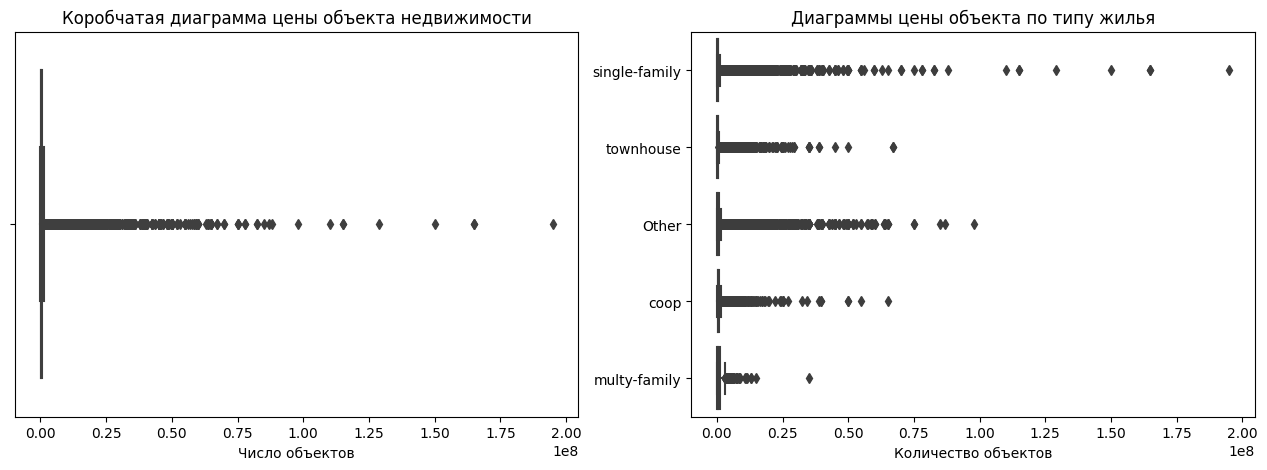

In [2955]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Построим диаграмму признака
boxplot = sns.boxplot(
    data,
    x = 'target_1',
    ax = axes[0]
)
boxplot.set()
boxplot.set_title('Коробчатая диаграмма цены объекта недвижимости')
boxplot.set_xlabel('Число объектов')
boxplot = sns.boxplot(
    data,
    x = 'target_1',
    y = 'propertyType',
    ax = axes[1]
)
boxplot.set();
boxplot.set_title('Диаграммы цены объекта по типу жилья')
boxplot.set_xlabel('Количество объектов')
boxplot.set_ylabel('')

In [2956]:
data['target_2']=cleaned['target_1']

In [2957]:
#Данные с пропусками удалим, потому что корректно заполнить их невозможно
data =data.dropna(subset=['target_2'])

In [2958]:
print(f"Максимальная стоимость объекта недвижимости: {data['target_2'].max()}")
print(f"Минимальная стоимость объекта недвижимости: {data['target_2'].min()}")

Максимальная стоимость объекта недвижимости: 1184900.0
Минимальная стоимость объекта недвижимости: 1.0


In [2959]:
#Минимальная стоимость объекта недвижимости не может быть равна 1, слишком дешево. Рассмотрим еще цены.
data['target_2'].sort_values()[:50]

277244       1.0
321130       1.0
252334       1.0
15517        1.0
303681       1.0
25305        1.0
255892       1.0
288726       1.0
288821       1.0
177617       3.0
299880       3.0
161877       8.0
110157      20.0
316389      25.0
135279      29.0
275446      30.0
197396     250.0
212383     393.0
73580      500.0
50926      600.0
125423     600.0
364606     600.0
367988     700.0
133436     750.0
156720     750.0
124238     800.0
316308     800.0
191736     800.0
40707      825.0
352866     850.0
14989      900.0
216966     950.0
321999    1000.0
322074    1000.0
289102    1000.0
92339     1000.0
367295    1000.0
367560    1000.0
73947     1000.0
367346    1000.0
32397     1000.0
348351    1000.0
108426    1000.0
92377     1000.0
367425    1000.0
92451     1000.0
289091    1000.0
321841    1000.0
79946     1000.0
128374    1000.0
Name: target_2, dtype: float64

In [2960]:
low_price = data.loc[data['target_2'] < 100].shape[0]
print(f"Количество объектов недвижимости со стоимость меньше 100$: {low_price} шт.")

Количество объектов недвижимости со стоимость меньше 100$: 16 шт.


In [2961]:
#Рассмотрим в каких типах жилья содержатся наиболее дешевые объекты недвижимости
grouped_data = data[data['target_2'] < 100].groupby('propertyType').size()
print(f"Количество объектов недвижимости по стоимостью меньше 100$ по типу жилья: {grouped_data}")

Количество объектов недвижимости по стоимостью меньше 100$ по типу жилья: propertyType
Other            12
single-family     4
dtype: int64


In [2962]:
#Наибольшее число объектов с наименьшей ценой встречается у жилья с типом собственности others.
# Несмотря на то, что у single-family всего 4 низкие цены, удалим все значения меньне 100 $
data.drop(data[data['target_2'] < 100].index, inplace=True)

In [2963]:
data = data.drop(['target', 'target_1'], axis=1)

Закончили с обработкой признаков, проверим еще раз итоговые столбцы, типы данных, пропуски и дубликаты

In [2964]:
data=data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306445 entries, 0 to 376722
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   status                 306445 non-null  object 
 1   propertyType           306445 non-null  object 
 2   fireplace              306445 non-null  bool   
 3   city                   306445 non-null  object 
 4   zipcode                306445 non-null  object 
 5   state                  306445 non-null  object 
 6   Pool                   306445 non-null  bool   
 7   MlsID                  306445 non-null  object 
 8   street_type            306445 non-null  object 
 9   baths_1                306445 non-null  float64
 10  Year built             306445 non-null  object 
 11  Cooling                306445 non-null  bool   
 12  lotsize                306445 non-null  float64
 13  Price/sqft             306445 non-null  object 
 14  Heating_Category       306445 non-nu

In [2965]:
#Посмотрим на количество дубликатов в данных:
print(f"Количество дубликатов в данных: {data.duplicated().sum()} шт.")

Количество дубликатов в данных: 734 шт.


In [2966]:
#Удаляем дубликаты
data = data.drop_duplicates(ignore_index=True)

In [2967]:
#Проверяем на пропуски
#Отобразим пропуски
missing_values = data.isnull().sum()
for column_name, missing_count in missing_values.items():
    if missing_count > 0:
        print(f'В столбце {column_name} {missing_count} пропусков')

print(missing_values)

status                   0
propertyType             0
fireplace                0
city                     0
zipcode                  0
state                    0
Pool                     0
MlsID                    0
street_type              0
baths_1                  0
Year built               0
Cooling                  0
lotsize                  0
Price/sqft               0
Heating_Category         0
school_rating _mean_1    0
school_dist_min_1        0
sqft_1                   0
target_2                 0
dtype: int64


In [2968]:
#Удалим столбец MlsID, так как это уникальный идентификатор в системе, на целевой признак не влияет
#Удалим столбец lotsize, так как унас есть признак отражающий площадь
# Столбец Price/sqft так же удаляем, так как цена - это наш целевой признак, возможно утечка данных.
data = data.drop(['MlsID', 'lotsize', 'Price/sqft'], axis=1)

In [2969]:
# На этом считаю анализ и обработка данных завершены.
#Сохраняем результат
data.to_pickle("data.pkl")

In [2970]:
data = pd.read_pickle("data.pkl")

In [2971]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305711 entries, 0 to 305710
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   status                 305711 non-null  object 
 1   propertyType           305711 non-null  object 
 2   fireplace              305711 non-null  bool   
 3   city                   305711 non-null  object 
 4   zipcode                305711 non-null  object 
 5   state                  305711 non-null  object 
 6   Pool                   305711 non-null  bool   
 7   street_type            305711 non-null  object 
 8   baths_1                305711 non-null  float64
 9   Year built             305711 non-null  object 
 10  Cooling                305711 non-null  bool   
 11  Heating_Category       305711 non-null  object 
 12  school_rating _mean_1  305711 non-null  float64
 13  school_dist_min_1      305711 non-null  float64
 14  sqft_1                 305711 non-nu

Преобразованный датасет имеет 16 столбцов с тремя типами данных: бинарными - (3), категориальными - (8), числовыми - (5).

In [2972]:
binar_features = ['fireplace', 'Pool', 'Cooling']

categorial_features = ['status', 'propertyType', 'city', 'zipcode', 'state', 'street_type', 'Year built', 'Heating_Category']

float_features = ['baths_1', 'sqft_1', 'target_2', 'school_rating _mean_1', 'school_dist_min_1']

In [2973]:
# Рассмотрим и закодируем категориальные признаки
#Отобразим количество уникальных значений
for column in categorial_features:
    unique_values = data[column].nunique()
    print(f"В столбце {column} количество уникальных значений: {unique_values}")

В столбце status количество уникальных значений: 6
В столбце propertyType количество уникальных значений: 5
В столбце city количество уникальных значений: 301
В столбце zipcode количество уникальных значений: 4405
В столбце state количество уникальных значений: 36
В столбце street_type количество уникальных значений: 5
В столбце Year built количество уникальных значений: 142
В столбце Heating_Category количество уникальных значений: 5


In [2974]:
!pip install category_encoders
import category_encoders as ce

In [2975]:
# Признак Year built - порядковый, поэтому применим Ordinal Encoding
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(data[['Year built']])
data = pd.concat([data, data_bin], axis=1)

In [2976]:
# Признаки 'status', 'propertyType', 'street_type', 'Heating_Category' - номинальные, имеют меньше 15 значений, поэтому для кодирования будем использовать OneHotEncoding
data_dummies = pd.get_dummies(data, columns=['status', 'propertyType', 'street_type', 'Heating_Category'])
data=pd.concat([data, data_dummies], axis=1)

In [2786]:
# Признаки 'city', 'zipcode', 'state' имеют больше 15 значений, поэтому для кодирования используем Binary Encoding

In [2977]:
import category_encoders as ce

# Создание объекта BinaryEncoder
bin_encoder = ce.BinaryEncoder()

# Применение бинарного кодирования к заданному столбцу или столбцам
data_encoded = bin_encoder.fit_transform(['city', 'zipcode', 'state'])
data=pd.concat([data, data_encoded], axis=1)

In [2978]:
# После кодирования номинальных признаков, удаляем изначальные столбцы, проверяем на наличие дубликатов
columnsToDelete = ['status', 'propertyType', 'street_type', 'Heating_Category','city', 'zipcode', 'state']
data.drop(columnsToDelete, axis = 1, inplace=True)

In [2979]:
print(f"Количество дубликатов в данных: {data.duplicated().sum()} шт.")

Количество дубликатов в данных: 2895 шт.


In [2980]:
#Удаляем дубликаты
data = data.drop_duplicates(ignore_index=True)

In [2981]:
print(f"Количество дубликатов в данных: {data.duplicated().sum()} шт.")

Количество дубликатов в данных: 0 шт.


In [2982]:
data=data.copy()

In [2983]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302816 entries, 0 to 302815
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   fireplace                   302816 non-null  bool   
 1   Pool                        302816 non-null  bool   
 2   baths_1                     302816 non-null  float64
 3   Year built                  302816 non-null  object 
 4   Cooling                     302816 non-null  bool   
 5   school_rating _mean_1       302816 non-null  float64
 6   school_dist_min_1           302816 non-null  float64
 7   sqft_1                      302816 non-null  float64
 8   target_2                    302816 non-null  float64
 9   Year built                  302816 non-null  int64  
 10  fireplace                   302816 non-null  bool   
 11  Pool                        302816 non-null  bool   
 12  baths_1                     302816 non-null  float64
 13  Year built    

In [2984]:
# Рассмотрим числовые признаки
float_features = ['baths_1', 'sqft_1', 'target_2', 'school_rating _mean_1', 'school_dist_min_1']

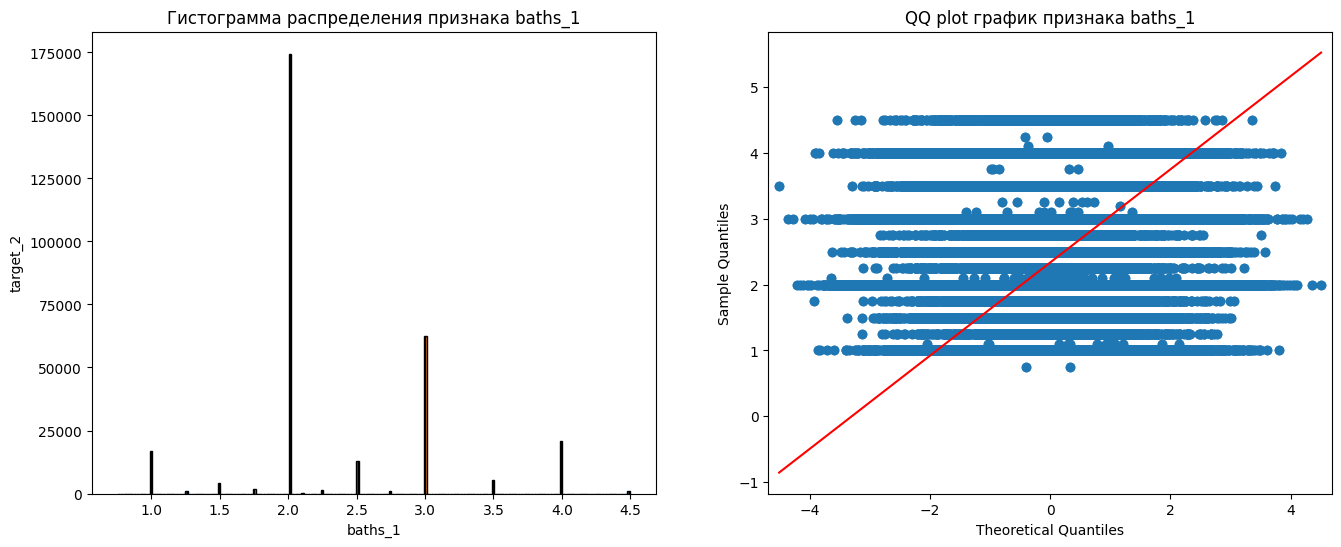

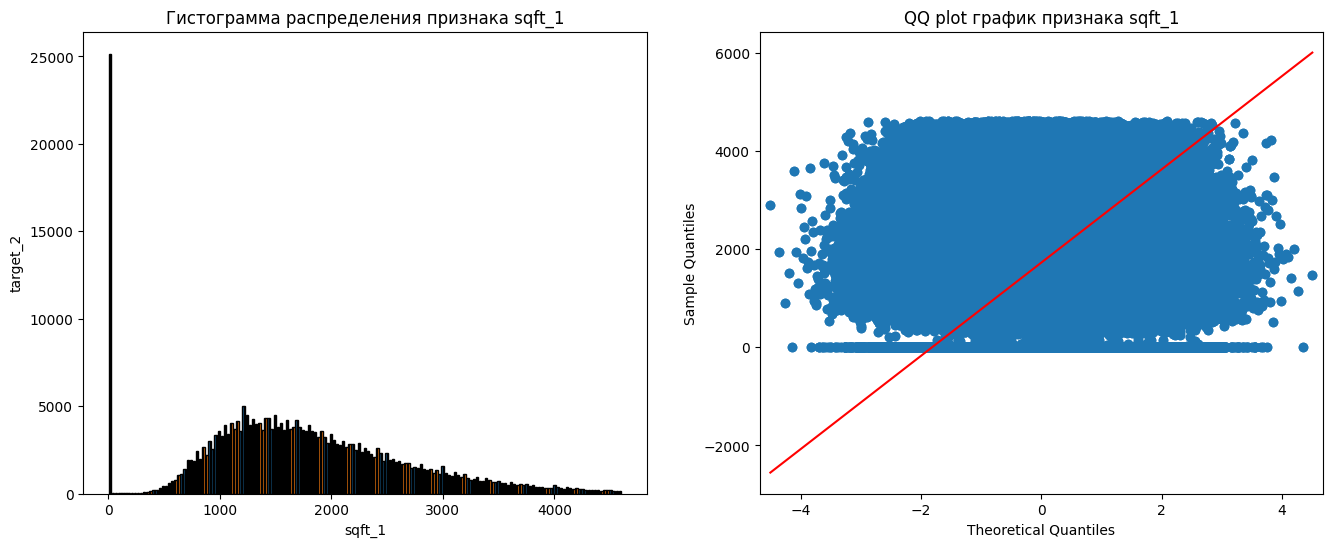

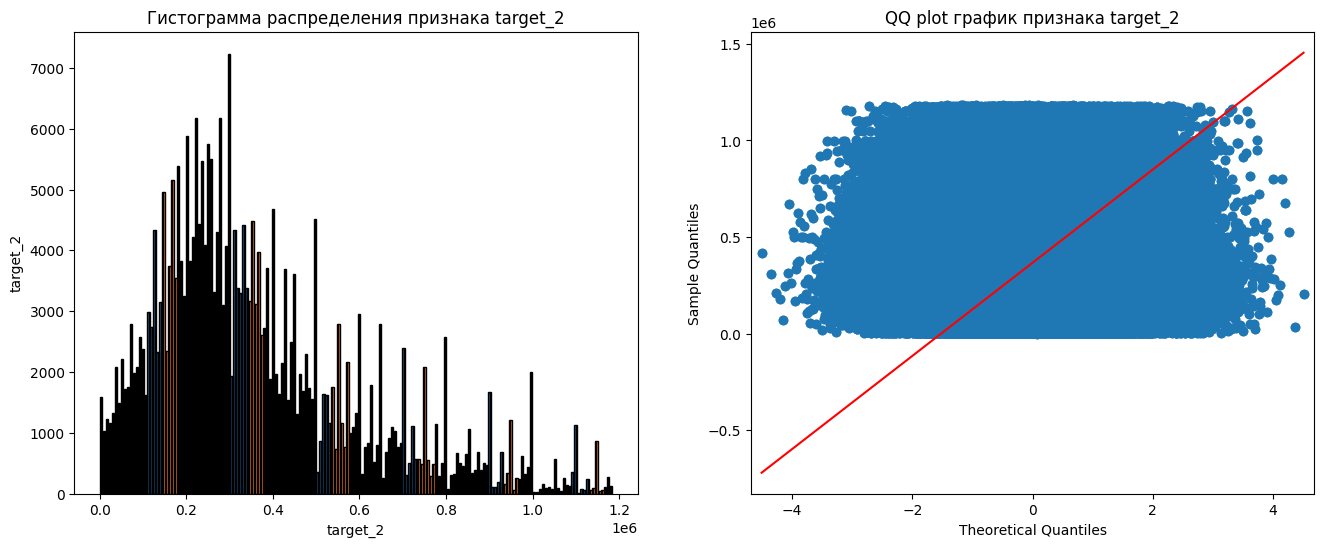

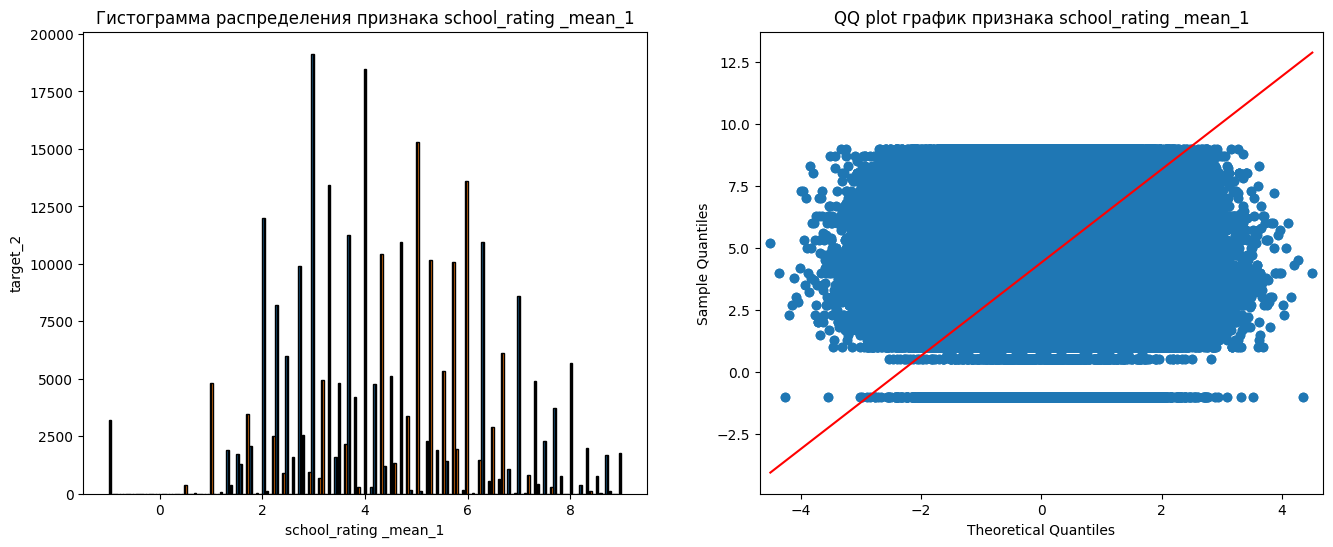

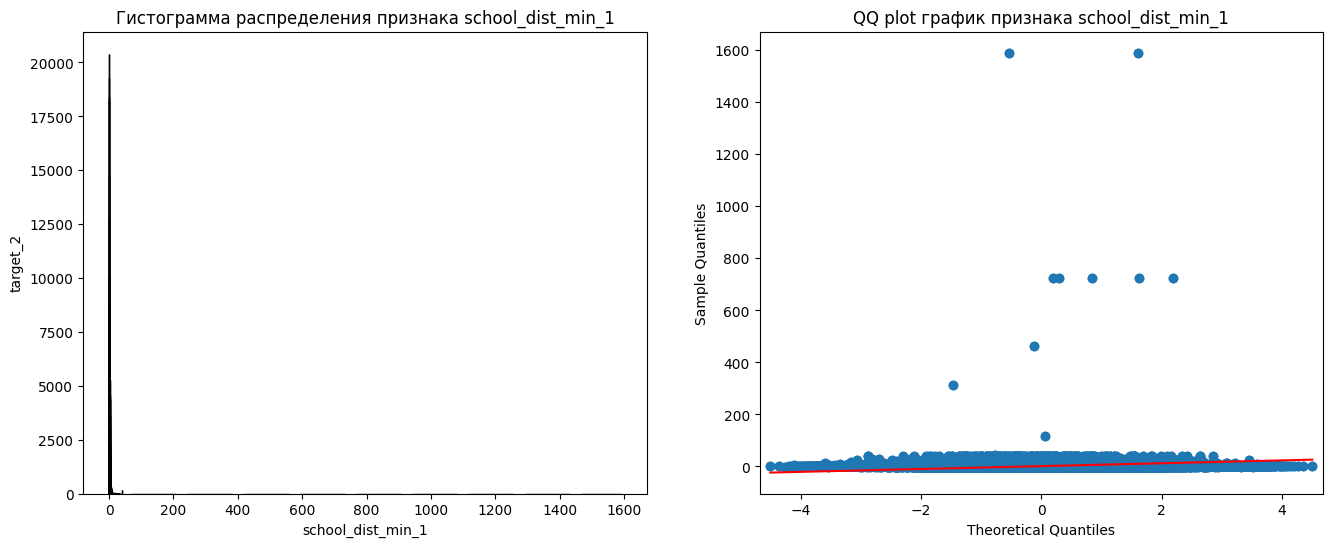

In [2986]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

# Цикл по признакам
for feature in float_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Гистограмма
    ax1.hist(data[feature], bins='auto', edgecolor='k')
    ax1.set_title('Гистограмма распределения признака ' + feature)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('target_2')

    # QQ-график
    sm.qqplot(data[feature], line='s', ax=ax2)
    ax2.set_title('QQ plot график признака ' + feature)

    plt.show()

Выводы:
1. Гистограмма для признакак baths показывает, что распределение значений признака близко к нормальному.
QQ график для признака baths показывает, что распределение имеет разряженные хвосты справа и слева, концентрированно к центру.
2. Гистограмма для признакак sqft показывает, что распределение значений признака близко к нормальному, но много нулевых значений, а также большой правый хвост.
QQ график для признака sqft показывает, что распределение имеет разряженные хвосты справа и слева, концентрированно к центру.
3. Гистограмма для признакак school_rating_mean показывает, что распределение значений признака близко к нормальному, но большой левый хвост.
QQ график для признака school_rating_mean показывает, что распределение имеет разряженные хвосты справа и слева, концентрированно к центру.
4. Гистограмма для признакак school_rating_mean показывает, что очень много нулевых значений, а также есть аномальные значения.
QQ график для признака school_rating_mean показывает, что распределение близко к нормальному, но имеет выбросы.

In [2987]:
print(f"Количество дубликатов в данных: {data.duplicated().sum()} шт.")

Количество дубликатов в данных: 0 шт.


In [2991]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302816 entries, 0 to 302815
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   fireplace                   302816 non-null  bool   
 1   Pool                        302816 non-null  bool   
 2   baths_1                     302816 non-null  float64
 3   Year built                  302816 non-null  object 
 4   Cooling                     302816 non-null  bool   
 5   school_rating _mean_1       302816 non-null  float64
 6   school_dist_min_1           302816 non-null  float64
 7   sqft_1                      302816 non-null  float64
 8   target_2                    302816 non-null  float64
 9   Year built                  302816 non-null  int64  
 10  fireplace                   302816 non-null  bool   
 11  Pool                        302816 non-null  bool   
 12  baths_1                     302816 non-null  float64
 13  Year built    

In [2992]:
data = data.loc[:, ~data.columns.duplicated()]

In [2993]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302816 entries, 0 to 302815
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   fireplace                   302816 non-null  bool   
 1   Pool                        302816 non-null  bool   
 2   baths_1                     302816 non-null  float64
 3   Year built                  302816 non-null  object 
 4   Cooling                     302816 non-null  bool   
 5   school_rating _mean_1       302816 non-null  float64
 6   school_dist_min_1           302816 non-null  float64
 7   sqft_1                      302816 non-null  float64
 8   target_2                    302816 non-null  float64
 9   status_Active               302816 non-null  uint8  
 10  status_Contingent           302816 non-null  uint8  
 11  status_Foreclosure          302816 non-null  uint8  
 12  status_New construction     302816 non-null  uint8  
 13  status_Other  

In [2994]:
filtered1_data = data[data['school_dist_min_1'] > 100]
display(filtered1_data)

,fireplace,Pool,baths_1,Year built,Cooling,school_rating _mean_1,school_dist_min_1,sqft_1,target_2,status_Active,...,street_type_blvd,street_type_ln,street_type_st,Heating_Category_NaN,Heating_Category_air,Heating_Category_electric,Heating_Category_gas,Heating_Category_others,0_0,0_1
21478,False,False,4.0,1980,True,2.5,312.40,0.0,670000.0,0,...,0,0,0,0,1,0,0,0,NaN,NaN
88986,True,False,2.0,1963,True,2.7,1590.36,890.0,48640.0,1,...,1,0,0,0,1,0,0,0,NaN,NaN
136738,True,False,2.0,1950,False,7.5,460.86,720.0,18000.0,1,...,0,0,0,0,0,0,1,0,NaN,NaN
159427,False,False,2.0,0,False,4.3,117.80,0.0,109000.0,0,...,0,0,0,1,0,0,0,0,NaN,NaN
174081,True,False,3.0,1953,True,5.5,725.17,1230.0,57225.0,1,...,0,0,1,0,0,0,0,1,NaN,NaN
186544,True,False,3.0,1950,True,5.5,725.21,1230.0,57225.0,1,...,0,0,1,0,0,0,0,1,NaN,NaN
241646,True,False,3.0,1950,True,5.5,725.20,1230.0,57225.0,1,...,0,0,1,0,0,0,0,1,NaN,NaN
286555,True,True,2.0,1963,True,2.7,1590.38,890.0,48300.0,1,...,1,0,0,0,1,0,0,0,NaN,NaN
287024,True,False,3.0,1953,True,5.5,725.19,1230.0,57225.0,1,...,0,0,1,0,0,0,0,1,NaN,NaN
298568,True,False,3.0,1950,True,5.5,725.19,1230.0,57225.0,1,...,0,0,1,0,0,0,0,1,NaN,NaN


In [2995]:
#Получается всего 10 строк, имеющих выбросы по значению минимальное расстояние до школы. Удалим их.
data = data.drop(filtered1_data.index)

In [2996]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302806 entries, 0 to 302815
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   fireplace                   302806 non-null  bool   
 1   Pool                        302806 non-null  bool   
 2   baths_1                     302806 non-null  float64
 3   Year built                  302806 non-null  object 
 4   Cooling                     302806 non-null  bool   
 5   school_rating _mean_1       302806 non-null  float64
 6   school_dist_min_1           302806 non-null  float64
 7   sqft_1                      302806 non-null  float64
 8   target_2                    302806 non-null  float64
 9   status_Active               302806 non-null  uint8  
 10  status_Contingent           302806 non-null  uint8  
 11  status_Foreclosure          302806 non-null  uint8  
 12  status_New construction     302806 non-null  uint8  
 13  status_Other  